# Project 1: Price Prediction and Anomaly Detection for Motorcycles

1. The goal is to successfully develop a model that suggests reasonable listing prices for sellers. This model will also enable the system to detect unusual listings and inflated prices, ensuring a positive platform experience and supporting buyers.

2. Nhóm: Đinh Thị Bích Thủy + Dương Hoàng Phúc

## Import library package

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from analysis.analyzer import TTTH_Analyzer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import RobustScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

## 1. Load Data

In [2]:
data = pd.read_excel('./data_motobikes.xlsx')

In [3]:
data.head(3)

,id,Tiêu đề,Giá,Khoảng giá min,Khoảng giá max,Địa chỉ,Mô tả chi tiết,Thương hiệu,Dòng xe,Năm đăng ký,Số Km đã đi,Tình trạng,Loại xe,Dung tích xe,Xuất xứ,Chính sách bảo hành,Trọng lượng,Href
0,1,"Bán Vespa Sprint 125cc 2024 xanh dương, xe đẹp...",66.000.000 đ,72.53 tr,85.14 tr,"Phường Bến Thành, Quận 1, Tp Hồ Chí Minh",Bán xe #Vespa Sprint 125cc. Mua mới tại #Topco...,Piaggio,Vespa,2024,14000,Đã sử dụng,Tay ga,100 - 175 cc,Đang cập nhật,Bảo hành hãng,> 50 kg,https://xe.chotot.com/mua-ban-xe-may-quan-1-tp...
1,2,🔥🔥SH 150i Thắng ABS 2019 BSTP Chính Chủ,79.500.000 đ,62.76 tr,73.68 tr,"Phường Tân Định, Quận 1, Tp Hồ Chí Minh","_Bán SH 150i Thắng ABS 2019 Xám Bạc, Úp Team X...",Honda,SH,2019,28000,Đã sử dụng,Tay ga,100 - 175 cc,Đang cập nhật,Bảo hành hãng,> 50 kg,https://xe.chotot.com/mua-ban-xe-may-quan-1-tp...
2,3,CC Vision Thể Thao 2023 Đen+bộ đèn Demi audi A7,37.000.000 đ,28 tr,32.86 tr,"Phường Cầu Kho, Quận 1, Tp Hồ Chí Minh",Chính chủ bán Vision phiên bản Thể Thao 2023 Đ...,Honda,Vision,2023,12000,Đã sử dụng,Tay ga,100 - 175 cc,Đang cập nhật,Bảo hành hãng,> 50 kg,https://xe.chotot.com/mua-ban-xe-may-quan-1-tp...


In [4]:
data.tail(3)

,id,Tiêu đề,Giá,Khoảng giá min,Khoảng giá max,Địa chỉ,Mô tả chi tiết,Thương hiệu,Dòng xe,Năm đăng ký,Số Km đã đi,Tình trạng,Loại xe,Dung tích xe,Xuất xứ,Chính sách bảo hành,Trọng lượng,Href
7205,7206,Bán xe Yamaha Janus 2017 FI smart key màu xanh,13.500.000 đ,12.97 tr,15.23 tr,"Thị trấn Nhà Bè, Huyện Nhà Bè, Tp Hồ Chí Minh","Bán xe Yamaha Janus 2017 FI smart key, màu xan...",Yamaha,Janus,2017,49000,Đã sử dụng,Tay ga,100 - 175 cc,Việt Nam,Bảo hành hãng,> 50 kg,https://xe.chotot.com/mua-ban-xe-may-huyen-nha...
7206,7207,Bán xe Future Đời đầu Chính Chủ,10.500.000 đ,14.16 tr,16.63 tr,"Xã Phước Kiển, Huyện Nhà Bè, Tp Hồ Chí Minh",Xe cũ theo năm tháng những vẫn còn đẹp và liền...,Honda,Future,2000,80000,Đã sử dụng,Xe số,100 - 175 cc,Việt Nam,Bảo hành hãng,> 50 kg,https://xe.chotot.com/mua-ban-xe-may-huyen-nha...
7207,7208,Bán Ducati Scrambler 2020 chính chủ cavet BSSG,225.000.000 đ,NaN,NaN,"Xã Phước Kiển, Huyện Nhà Bè, Tp Hồ Chí Minh",Đổi xe nên bán Ducati scrambler sản xuất 2019 ...,Ducati,Scrambler,2020,30000,Đã sử dụng,Tay côn/Moto,Trên 175 cc,Đang cập nhật,Bảo hành hãng,> 50 kg,https://xe.chotot.com/mua-ban-xe-may-huyen-nha...


In [5]:
data.describe(include='all')

,id,Tiêu đề,Giá,Khoảng giá min,Khoảng giá max,Địa chỉ,Mô tả chi tiết,Thương hiệu,Dòng xe,Năm đăng ký,Số Km đã đi,Tình trạng,Loại xe,Dung tích xe,Xuất xứ,Chính sách bảo hành,Trọng lượng,Href
count,7208.000000,7207,7206,7006,7011,7167,7208,7205,7205,7208,7208.000000,7208,7208,7208,7208,7207,7207,7208
unique,NaN,6839,741,1304,1348,310,7183,37,195,79,NaN,2,3,7,12,1,1,7196
top,NaN,Bán xe,25.000.000 đ,23.44 tr,7.94 tr,"Phường Tân Chánh Hiệp, Quận 12, Tp Hồ Chí Minh",Mình cần bán xe như hình \nXe giấy tờ đầy đủ n...,Honda,Wave,2019,NaN,Đã sử dụng,Tay ga,100 - 175 cc,Việt Nam,Bảo hành hãng,> 50 kg,https://xe.chotot.com/mua-ban-xe-may-quan-3-tp...
freq,NaN,29,138,43,54,113,10,4374,727,482,NaN,7207,3600,5857,2875,7207,7207,3
mean,3604.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64378.889012,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,2080.914703,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,136573.455355,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,1802.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,3604.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,5406.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53327.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- Quan sát sơ bộ dataset.
    1. Rất nhiều unique value ở nhóm category.
    2. Một số numeric features có nhiễu nặng, outlier nhiều
    

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7208 entries, 0 to 7207
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   7208 non-null   int64 
 1   Tiêu đề              7207 non-null   object
 2   Giá                  7206 non-null   object
 3   Khoảng giá min       7006 non-null   object
 4   Khoảng giá max       7011 non-null   object
 5   Địa chỉ              7167 non-null   object
 6   Mô tả chi tiết       7208 non-null   object
 7   Thương hiệu          7205 non-null   object
 8   Dòng xe              7205 non-null   object
 9   Năm đăng ký          7208 non-null   object
 10  Số Km đã đi          7208 non-null   int64 
 11  Tình trạng           7208 non-null   object
 12  Loại xe              7208 non-null   object
 13  Dung tích xe         7208 non-null   object
 14  Xuất xứ              7208 non-null   object
 15  Chính sách bảo hành  7207 non-null   object
 16  Trọng 

## 2. Data cleaning

### 2.1 Remove columns

In [7]:
# Check unique values on each column
for col in data.columns:
    print(f"{col}: {data[col].nunique()} unique values")

id: 7208 unique values
Tiêu đề: 6839 unique values
Giá: 741 unique values
Khoảng giá min: 1304 unique values
Khoảng giá max: 1348 unique values
Địa chỉ: 310 unique values
Mô tả chi tiết: 7183 unique values
Thương hiệu: 37 unique values
Dòng xe: 195 unique values
Năm đăng ký: 79 unique values
Số Km đã đi: 1323 unique values
Tình trạng: 2 unique values
Loại xe: 3 unique values
Dung tích xe: 7 unique values
Xuất xứ: 12 unique values
Chính sách bảo hành: 1 unique values
Trọng lượng: 1 unique values
Href: 7196 unique values


In [8]:
# Show unique values for column with 1 and 2 unique value
for col in data.columns:
    if data[col].nunique() in [1, 2]:
        print(f"Unique value in column {col}: {data[col].unique()}")

Unique value in column Tình trạng: ['Đã sử dụng' 'Mới']
Unique value in column Chính sách bảo hành: ['Bảo hành hãng' nan]
Unique value in column Trọng lượng: ['> 50 kg' nan]


In [9]:
# Show data with Tình trạng = 'Mới'
df_new = data[data['Tình trạng'] == 'Mới']
df_new.head()

,id,Tiêu đề,Giá,Khoảng giá min,Khoảng giá max,Địa chỉ,Mô tả chi tiết,Thương hiệu,Dòng xe,Năm đăng ký,Số Km đã đi,Tình trạng,Loại xe,Dung tích xe,Xuất xứ,Chính sách bảo hành,Trọng lượng,Href
1093,1094,"RE Classic 350cc, siêu lướt ODO 2.412 km",103.000.000 đ,NaN,NaN,"Phường Phú Thuận, Quận 7, Tp Hồ Chí Minh",Dòng motor classic A2 một máy 350 cc nhưng rất...,Royal Enfield,Dòng khác,2023,2412,Mới,Tay côn/Moto,Trên 175 cc,Ấn Độ,Bảo hành hãng,> 50 kg,https://xe.chotot.com/mua-ban-xe-may-quan-7-tp...


1. Loại bỏ cột ID không cần thiết
2. Loại bỏ cột Href không cần thiết
3. Loại Chính sách bảo hành do chỉ có 1 giá trị
4. Loại bỏ trọng lượng do chỉ có 1 giá trị
5. Loại bỏ tình trạng: xe đã chạy nên cũng được xem là đã sử dụng >> chỉ có 1 giá trị độc nhất.
6. Loại bỏ Khoảng giá min, Khoảng giá max (giá đề xuất từ hệ thống >> loại bỏ)
6. Tiêu đề, mô tả chi tiết tách riêng ra dataframe df_NLP để phân tích thêm nếu có thời gian

In [10]:
df_NPL = data[['Tiêu đề', 'Mô tả chi tiết','Giá']]
df_NPL.head()

,Tiêu đề,Mô tả chi tiết,Giá
0,"Bán Vespa Sprint 125cc 2024 xanh dương, xe đẹp...",Bán xe #Vespa Sprint 125cc. Mua mới tại #Topco...,66.000.000 đ
1,🔥🔥SH 150i Thắng ABS 2019 BSTP Chính Chủ,"_Bán SH 150i Thắng ABS 2019 Xám Bạc, Úp Team X...",79.500.000 đ
2,CC Vision Thể Thao 2023 Đen+bộ đèn Demi audi A7,Chính chủ bán Vision phiên bản Thể Thao 2023 Đ...,37.000.000 đ
3,Vespa Sprint 2019 -125- Đen Đỏ Sport -CHÍNH ...,XE CÁ NHÂN BÁN - XE DO EM ĐỨNG TÊN CHÍNH C...,45.000.000 đ
4,Xe tay ga Yamaha Latte 125 – Đăng ký 2021,🛵 Thông tin xe:\n\nDòng xe tay ga cao cấp Yama...,23.000.000 đ


- df_NPL phục vụ cho việc phân tích NLP nâng cao để tìm thêm feature nếu có thêm thời gian.

In [11]:
# Remove id and Href columns
df = data.drop(columns=['id', 'Href', 'Chính sách bảo hành', 'Trọng lượng', 'Tình trạng', 'Tiêu đề', 'Mô tả chi tiết','Khoảng giá min','Khoảng giá max'])
df.head()

,Giá,Địa chỉ,Thương hiệu,Dòng xe,Năm đăng ký,Số Km đã đi,Loại xe,Dung tích xe,Xuất xứ
0,66.000.000 đ,"Phường Bến Thành, Quận 1, Tp Hồ Chí Minh",Piaggio,Vespa,2024,14000,Tay ga,100 - 175 cc,Đang cập nhật
1,79.500.000 đ,"Phường Tân Định, Quận 1, Tp Hồ Chí Minh",Honda,SH,2019,28000,Tay ga,100 - 175 cc,Đang cập nhật
2,37.000.000 đ,"Phường Cầu Kho, Quận 1, Tp Hồ Chí Minh",Honda,Vision,2023,12000,Tay ga,100 - 175 cc,Đang cập nhật
3,45.000.000 đ,"Phường Bến Nghé, Quận 1, Tp Hồ Chí Minh",Piaggio,Vespa,2019,60000,Tay ga,100 - 175 cc,Đang cập nhật
4,23.000.000 đ,"Phường Tân Định, Quận 1, Tp Hồ Chí Minh",Yamaha,Latte,2021,24000,Tay ga,100 - 175 cc,Nhật Bản


### 2.2 Remove duplicated

In [12]:
# check duplicated
if df.duplicated().sum() == 0:
    print("No duplicated")
else:
    num_duplicates = df.duplicated().sum()
    total_records = len(df)
    print(f"Data shape before removing duplicates: {df.shape}")
    print(f"Number of duplicate records: {num_duplicates}, Percentage: {num_duplicates/total_records*100:.2f}%")
    df = df.drop_duplicates()
    print(f"Data shape after removing duplicates: {df.shape}")

Data shape before removing duplicates: (7208, 9)
Number of duplicate records: 65, Percentage: 0.90%
Data shape after removing duplicates: (7143, 9)


### 2.3 Handle missing value

In [13]:
# check null data
df.isnull().sum()

Giá              2
Địa chỉ         41
Thương hiệu      3
Dòng xe          3
Năm đăng ký      0
Số Km đã đi      0
Loại xe          0
Dung tích xe     0
Xuất xứ          0
dtype: int64

In [14]:
df = df[df["Giá"].notnull()].copy()
df = df[df["Thương hiệu"].notnull()].copy()
df = df[df["Dòng xe"].notnull()].copy()

- Drop bỏ các cột có ít null

### 2.4 Transform columns.

In [15]:
# Remove đ and dot in Giá column, handle errors, conver to million VND
df['Giá'] = df['Giá'].str.replace('đ', '').str.replace('.', '').str.replace(' ', '')
df['Giá'] = pd.to_numeric(df['Giá'], errors='coerce')
df['Giá'] = df['Giá'] / 1_000_000  # Convert to million VND

In [16]:
# Get the middle part of Địa chỉ and handle missing values with 'Unknown'
df['Địa chỉ'] = df['Địa chỉ'].str.split(',').str[1].str.strip()
df['Địa chỉ'] = df['Địa chỉ'].fillna('Unknown')
df.head()

,Giá,Địa chỉ,Thương hiệu,Dòng xe,Năm đăng ký,Số Km đã đi,Loại xe,Dung tích xe,Xuất xứ
0,66.0,Quận 1,Piaggio,Vespa,2024,14000,Tay ga,100 - 175 cc,Đang cập nhật
1,79.5,Quận 1,Honda,SH,2019,28000,Tay ga,100 - 175 cc,Đang cập nhật
2,37.0,Quận 1,Honda,Vision,2023,12000,Tay ga,100 - 175 cc,Đang cập nhật
3,45.0,Quận 1,Piaggio,Vespa,2019,60000,Tay ga,100 - 175 cc,Đang cập nhật
4,23.0,Quận 1,Yamaha,Latte,2021,24000,Tay ga,100 - 175 cc,Nhật Bản


In [17]:
# Show unque values on Năm đăng ký, only unique values
print(df['Năm đăng ký'].unique())

['2024' '2019' '2023' '2021' '2018' '2013' '2003' '2015' '2020'
 'trước năm 1980' '2005' '2016' '2014' '2001' '2022' '2008' '2010' '2011'
 '2009' '2012' '2004' '2017' '1986' '1998' '2007' '1997' '2025' '2006'
 '2000' 2019 2012 2002 2018 2017 2011 2014 2024 2022 2008 2010 2001 2015
 2021 2000 1998 2016 2020 2009 2013 2023 2007 1999 2006 1997 2005 1996
 '2002' '1995' '1996' 2004 1982 1994 2003 1988 '1987' '1993' '1990' '1992'
 '1999' '1981' '1982' '1989' '1988' '1994' 2025 1995 '1991' '1985' '1984']


In [18]:
# Replace 'trước năm 1980' by 1980 and convert to numeric
df['Năm đăng ký'] = df['Năm đăng ký'].replace('trước năm 1980', '1979')
df['Năm đăng ký'] = pd.to_numeric(df['Năm đăng ký'], errors='coerce')
df.head()

,Giá,Địa chỉ,Thương hiệu,Dòng xe,Năm đăng ký,Số Km đã đi,Loại xe,Dung tích xe,Xuất xứ
0,66.0,Quận 1,Piaggio,Vespa,2024,14000,Tay ga,100 - 175 cc,Đang cập nhật
1,79.5,Quận 1,Honda,SH,2019,28000,Tay ga,100 - 175 cc,Đang cập nhật
2,37.0,Quận 1,Honda,Vision,2023,12000,Tay ga,100 - 175 cc,Đang cập nhật
3,45.0,Quận 1,Piaggio,Vespa,2019,60000,Tay ga,100 - 175 cc,Đang cập nhật
4,23.0,Quận 1,Yamaha,Latte,2021,24000,Tay ga,100 - 175 cc,Nhật Bản


In [19]:
# Convert to age of vehicle = current year - Năm đăng ký and remove Năm đăng ký column
current_year = pd.Timestamp.now().year
df['Tuổi xe'] = current_year - df['Năm đăng ký']
df = df.drop(columns=['Năm đăng ký'])


In [20]:
df.head()

,Giá,Địa chỉ,Thương hiệu,Dòng xe,Số Km đã đi,Loại xe,Dung tích xe,Xuất xứ,Tuổi xe
0,66.0,Quận 1,Piaggio,Vespa,14000,Tay ga,100 - 175 cc,Đang cập nhật,1
1,79.5,Quận 1,Honda,SH,28000,Tay ga,100 - 175 cc,Đang cập nhật,6
2,37.0,Quận 1,Honda,Vision,12000,Tay ga,100 - 175 cc,Đang cập nhật,2
3,45.0,Quận 1,Piaggio,Vespa,60000,Tay ga,100 - 175 cc,Đang cập nhật,6
4,23.0,Quận 1,Yamaha,Latte,24000,Tay ga,100 - 175 cc,Nhật Bản,4


### 2.5 Rename column

In [21]:
# Rename columns to English
df = df.rename(columns={
    'Giá': 'price',
    'Thương hiệu': 'brand',
    'Dòng xe': 'model',
    'Địa chỉ': 'location',
    'Tuổi xe': 'age',
    'Loại xe': 'vehicle_type',
    'Số Km đã đi': 'km_driven',
    'Xuất xứ': 'origin',
    'Dung tích xe': 'engine_capacity'
})

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7138 entries, 0 to 7207
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   price            7138 non-null   float64
 1   location         7138 non-null   object 
 2   brand            7138 non-null   object 
 3   model            7138 non-null   object 
 4   km_driven        7138 non-null   int64  
 5   vehicle_type     7138 non-null   object 
 6   engine_capacity  7138 non-null   object 
 7   origin           7138 non-null   object 
 8   age              7138 non-null   int64  
dtypes: float64(1), int64(2), object(6)
memory usage: 557.7+ KB


In [23]:
#Check missing values again
df.isnull().sum()

price              0
location           0
brand              0
model              0
km_driven          0
vehicle_type       0
engine_capacity    0
origin             0
age                0
dtype: int64

- Tổng kết.
* Output variable: 'Giá'
* Input variable: 'Thương hiệu', 'Dòng xe', 'Số Km đã đi', 'Loại xe', 'Dung tích xe', 'Xuất xứ', 'Quận', 'Tuoi_xe'
* Các cột không cần thiết cho bài toán:
    * 'id': Chỉ là mã định danh, không liên quan đến giá
    * 'Tiêu đề': Dữ liệu dạng text tự do, cần NLP để xử lý
    * 'Khoảng giá min': là kết quả gợi ý của nền tảng Chợ tốt, không dùng để dự báo
    * 'Khoảng giá max': là kết quả gợi ý của nền tảng Chợ tốt, không dùng để dự báo
    * 'Địa chỉ': Dataset là dữ liệu ở TPHCM, đã tách ra cột Quận để mô hình học được chênh lệch giá theo khu vực
    * 'Mô tả chi tiết': Dữ liệu dạng text tự do, cần NLP để xử lý
    * 'Tình trạng': Dữ liệu không hợp lý
    * 'Năm đăng ký': đã đổi thành tuổi xe (int) nên bỏ cột này
    * 'Chính sách bảo hành': 7190 dữ liệu đều có giá trị “Bảo hành hãng”, 1 giá trị NA -> Cột này gần như không có sự thay đổi
    * 'Trọng lượng': 7190 dữ liệu đều có giá trị "> 50 kg", 1 giá trị NA -> Cột này gần như không có sự thay đổi
    * 'Href': Chỉ là link ở web, không có ý nghĩa với giá

## 4. EDA

### 4.1 Identify variable

In [24]:
df.columns

Index(['price', 'location', 'brand', 'model', 'km_driven', 'vehicle_type',
       'engine_capacity', 'origin', 'age'],
      dtype='object')

In [25]:
df.head()

,price,location,brand,model,km_driven,vehicle_type,engine_capacity,origin,age
0,66.0,Quận 1,Piaggio,Vespa,14000,Tay ga,100 - 175 cc,Đang cập nhật,1
1,79.5,Quận 1,Honda,SH,28000,Tay ga,100 - 175 cc,Đang cập nhật,6
2,37.0,Quận 1,Honda,Vision,12000,Tay ga,100 - 175 cc,Đang cập nhật,2
3,45.0,Quận 1,Piaggio,Vespa,60000,Tay ga,100 - 175 cc,Đang cập nhật,6
4,23.0,Quận 1,Yamaha,Latte,24000,Tay ga,100 - 175 cc,Nhật Bản,4


In [26]:
df_output = df[['price']]
df_input = df.drop('price', axis=1)
df_input_category = df_input.select_dtypes(include='O')
df_input_numeric = df_input.select_dtypes(exclude='O')

In [27]:
df_input_category.head(3)

,location,brand,model,vehicle_type,engine_capacity,origin
0,Quận 1,Piaggio,Vespa,Tay ga,100 - 175 cc,Đang cập nhật
1,Quận 1,Honda,SH,Tay ga,100 - 175 cc,Đang cập nhật
2,Quận 1,Honda,Vision,Tay ga,100 - 175 cc,Đang cập nhật


In [28]:
df_input_numeric.head(3)

,km_driven,age
0,14000,1
1,28000,6
2,12000,2


In [29]:
df_output.head()

,price
0,66.0
1,79.5
2,37.0
3,45.0
4,23.0


### 4. Category analysis

In [30]:
_analyzer = TTTH_Analyzer()

Class count of brand:

brand
Honda              4323
Yamaha             1405
Piaggio             380
Suzuki              278
SYM                 255
Hãng khác           231
Kawasaki             60
Kymco                27
Ducati               16
Detech               16
KTM                  13
GPX                  12
Harley Davidson      11
Halim                11
Daelim               11
BMW                  10
Triumph               9
Benelli               9
RebelUSA              8
Peugeot               6
Hyosung               6
Brixton               5
Nioshima              5
Bazan                 4
VinFast               3
Aprilia               3
Sachs                 3
Royal Enfield         3
Sanda                 3
Taya                  2
Victory               2
Keeway                2
CR&S                  2
Moto Guzzi            1
Vento                 1
Kengo                 1
Visitor               1
Name: count, dtype: int64


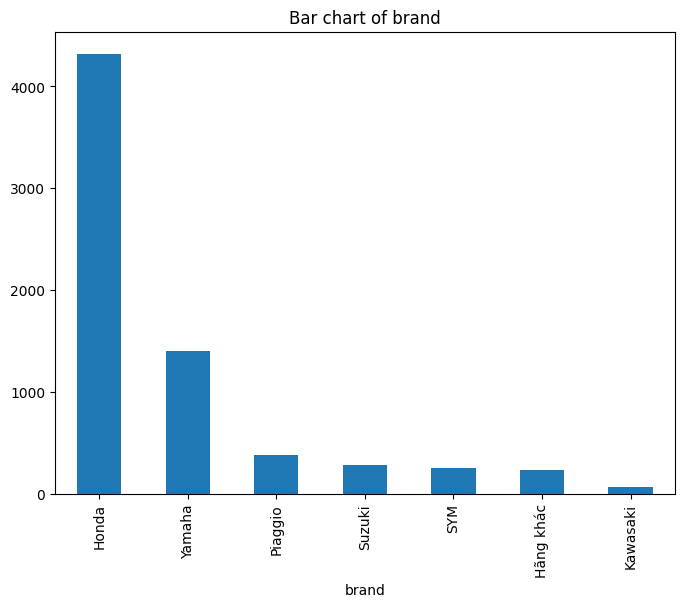

In [31]:
_analyzer.analyze_category_variable('brand', df_input_category)

* Note: Despite the presence of uncommon categories, Brand is a key factor affecting price, so uncommon categories will be retained.

Class count of model:

model
Wave           719
SH             620
Air Blade      599
Dòng khác      525
Exciter        472
              ... 
T15              1
Demon 150GR      1
Like MMC         1
ST               1
Cello            1
Name: count, Length: 195, dtype: int64


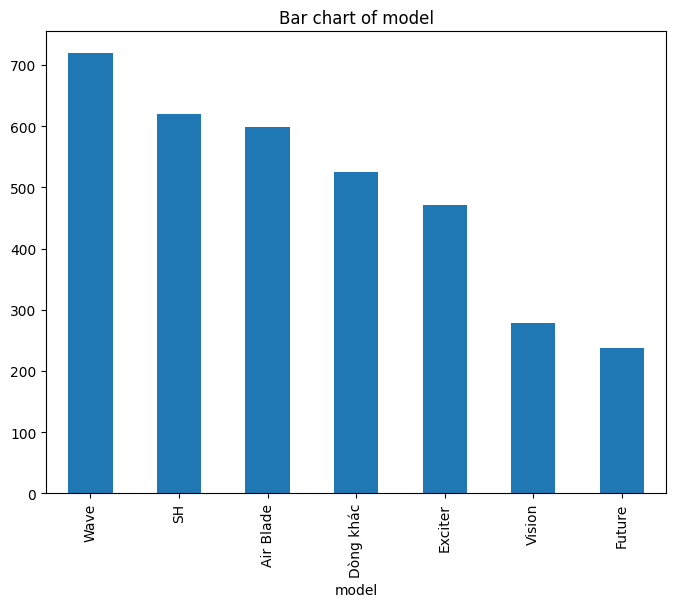

In [32]:
_analyzer.analyze_category_variable('model', df_input_category)

* Note: Despite the presence of uncommon categories, Model is a key factor affecting price, so uncommon categories will be retained.

Class count of vehicle_type:

vehicle_type
Tay ga          3565
Xe số           2174
Tay côn/Moto    1399
Name: count, dtype: int64


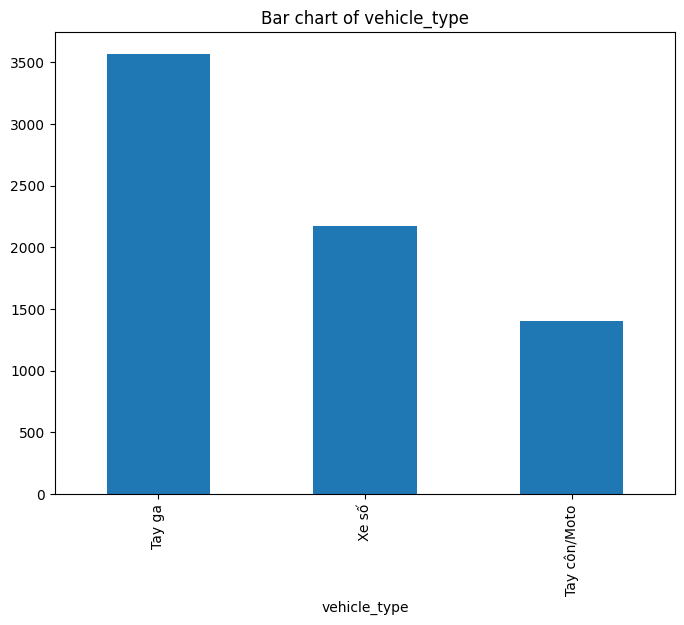

In [33]:
_analyzer.analyze_category_variable('vehicle_type', df_input_category)

Class count of engine_capacity:

engine_capacity
100 - 175 cc     5794
50 - 100 cc       683
Trên 175 cc       310
Dưới 50 cc        285
Không biết rõ      57
Đang cập nhật       8
Nhật Bản            1
Name: count, dtype: int64


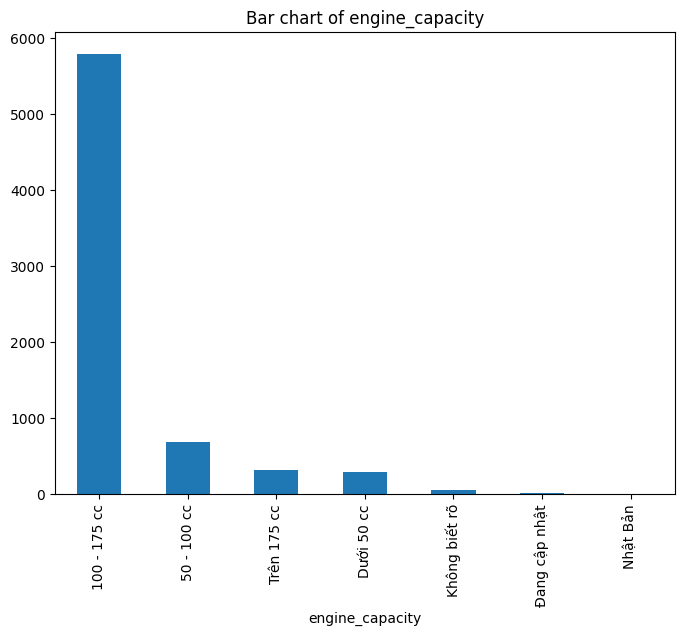

In [34]:
_analyzer.analyze_category_variable('engine_capacity', df_input_category)

* Note: Rare values like "Không biết rõ", "Đang cập nhật", and "Nhật Bản" appear very infrequently and carry little information. Grouping them into a single "Other" category reduces noise and helps the model perform more reliably.

In [35]:
rare_values = ['Không biết rõ', 'Đang cập nhật', 'Nhật Bản']
df_input_category['engine_capacity'] = df_input_category['engine_capacity'].replace(rare_values, 'Other')

Class count of origin:

origin
Việt Nam         2844
Nhật Bản         1474
Đang cập nhật    1148
Nước khác         756
Thái Lan          367
Trung Quốc        174
Đài Loan          159
Hàn Quốc          128
Mỹ                 32
Đức                25
Ấn Độ              22
Bảo hành hãng       9
Name: count, dtype: int64


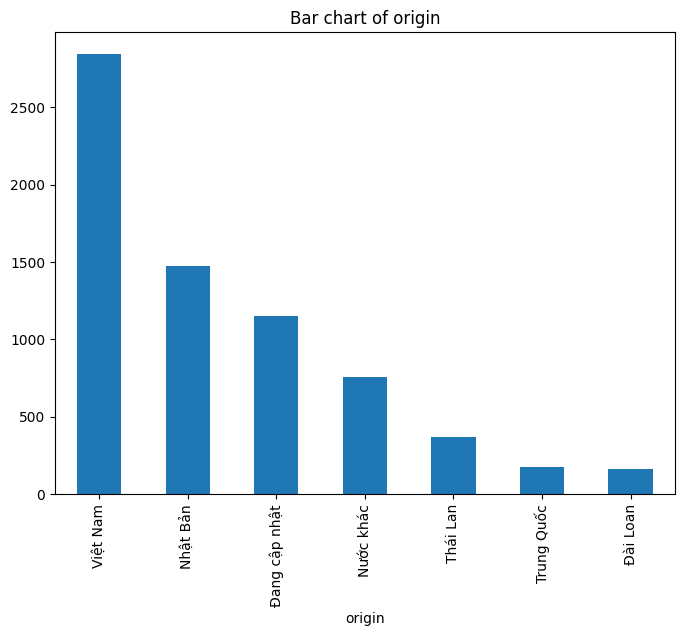

In [36]:
_analyzer.analyze_category_variable('origin', df_input_category)

Class count of location:

location
Thành phố Thủ Đức    1020
Quận 12               725
Quận Bình Tân         669
Quận Gò Vấp           489
Quận Tân Phú          423
Huyện Bình Chánh      417
Quận 7                404
Quận Bình Thạnh       401
Huyện Hóc Môn         384
Quận Tân Bình         339
Quận 8                339
Huyện Củ Chi          195
Quận 6                184
Quận 11               167
Quận 10               166
Huyện Nhà Bè          141
Quận 3                137
Quận 1                136
Quận 4                126
Quận Phú Nhuận        126
Quận 5                100
Unknown                39
Huyện Cần Giờ           9
Tp Hồ Chí Minh          2
Name: count, dtype: int64


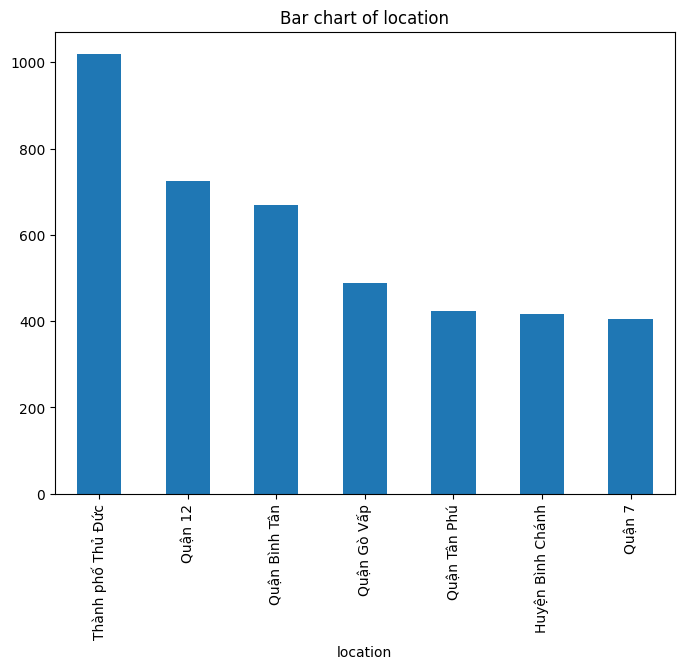

In [37]:
_analyzer.analyze_category_variable('location', df_input_category)

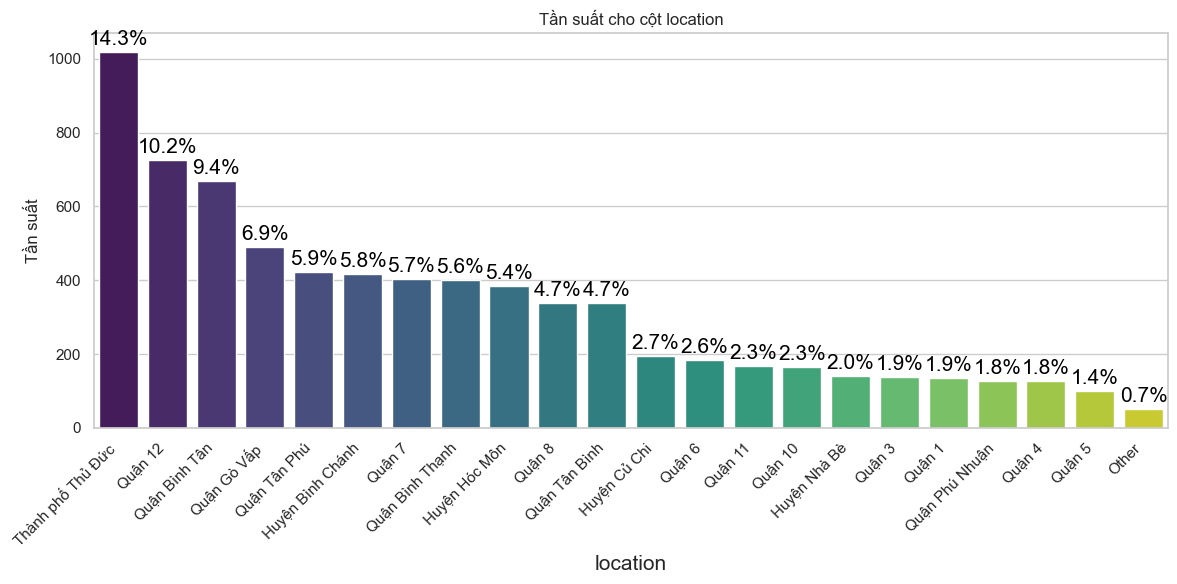

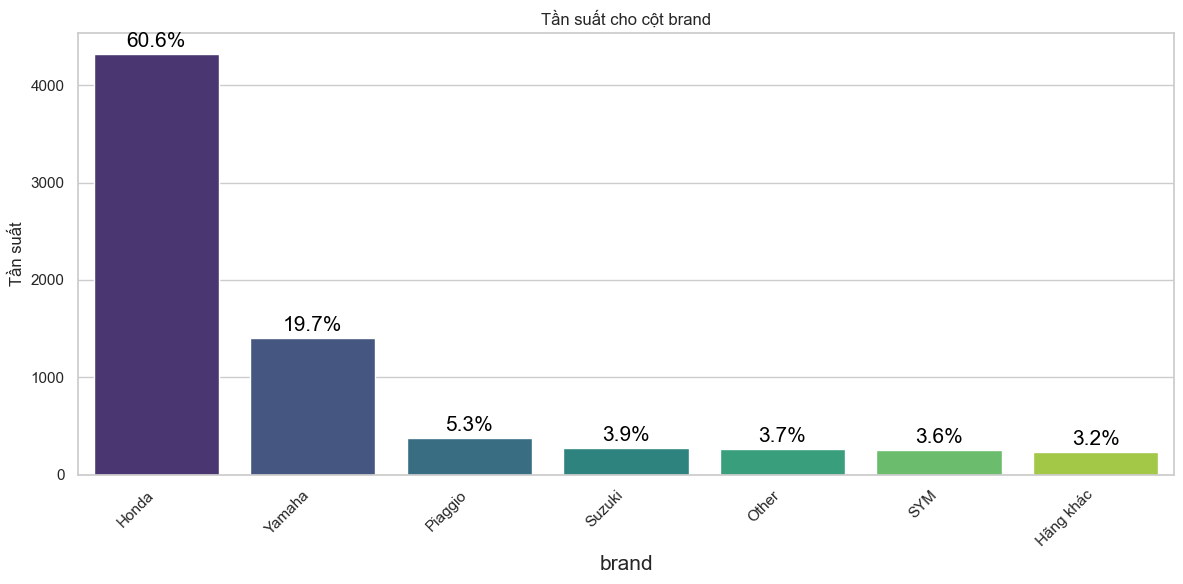

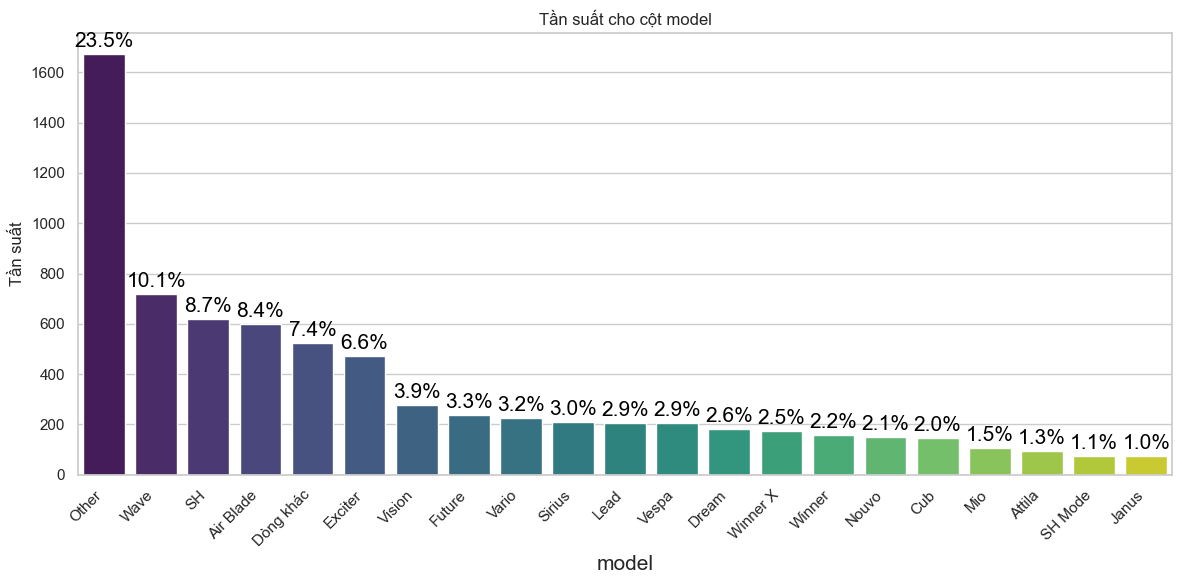

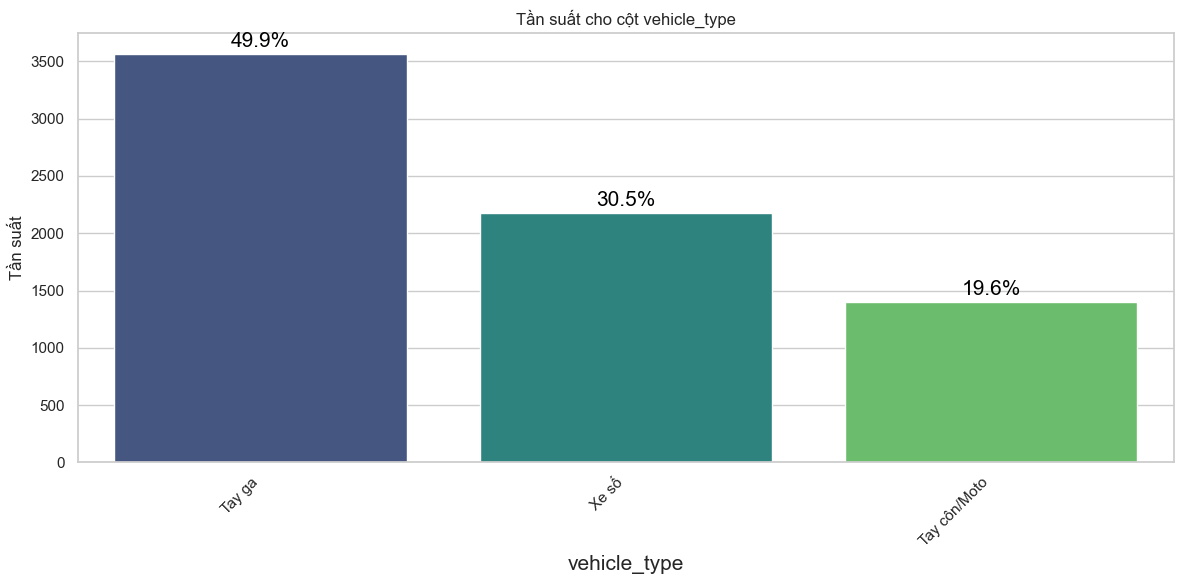

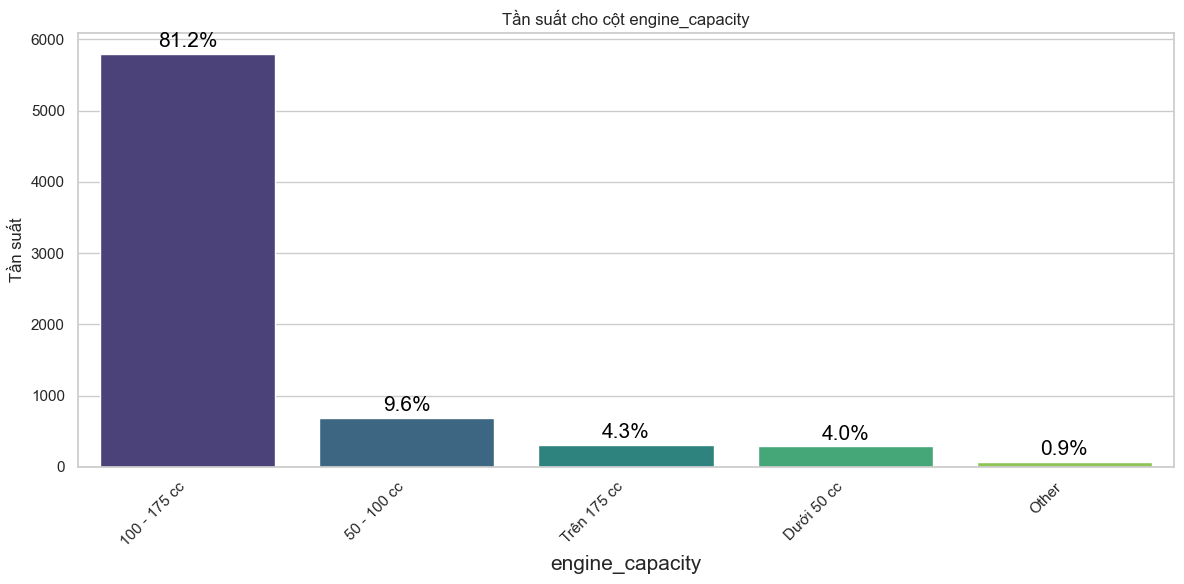

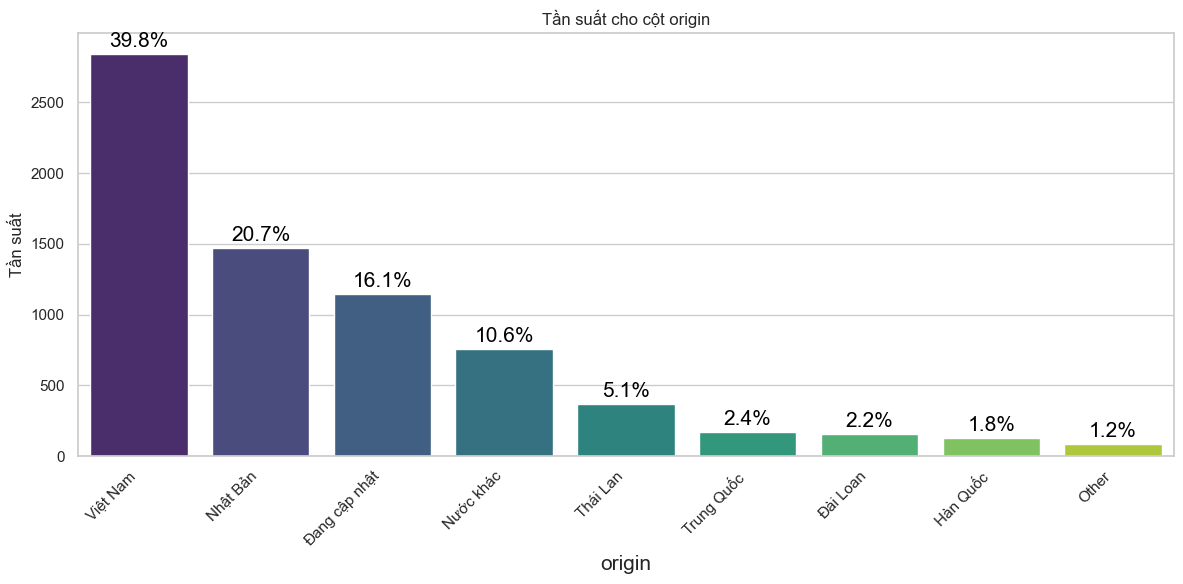

In [38]:
frequency_stats = {}
for column in df_input_category.columns:
    frequency_stats[column] = df_input_category[column].value_counts()

sns.set(style="whitegrid")

threshold = 0.01  # 1% tổng số lượng

for column, stats in frequency_stats.items():
    plt.figure(figsize=(12, 6))
    total = stats.sum()
    
    low_freq_labels = stats[stats / total < threshold].index
    stats = stats.groupby(stats.index.to_series().apply(lambda x: 'Other' if x in low_freq_labels else x)).sum()
    
    sorted_stats = stats.sort_values(ascending=False)
    
    ax = sns.barplot(x=sorted_stats.index, y=sorted_stats.values, palette="viridis")
    plt.title(f"Tần suất cho cột {column}")
    plt.xticks(rotation=45, ha="right")
    plt.xlabel(column,fontsize=15)
    plt.ylabel("Tần suất")
    
    for p in ax.patches:
        percentage = f'{100 * p.get_height() / total:.1f}%'
        ax.annotate(percentage, 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='baseline', fontsize=15, color='black', xytext=(0, 5),
                    textcoords='offset points')
    
    plt.tight_layout()
    plt.show()

1. Dòng xe của hãng Honda chiếm đại đa số xe rao bán, phản ánh thực tế thị trường xe Honda chiếm tỉ trọng lớn, tiếp theo sau là hãng Yamaha
2. Ba mẫu xe huyền thoại của hàng honda (Wave, SH và Airblade) chiếm tỉ trọng lớn trong bộ dữ liệu
3. Dòng xe tay ga chiếm phần lớn (50%)
4. Dung tích phổ biến là 100-175cc
5. Nguồn gốc xe đa số là từ thị trường trong nước (việt nam)
6. Khu vực Thủ Đức chiếm phần lớn lượng xe rao bán (14.3%), tiếp đó là Quận 12 và Bình Tân.

### 4.3 Numerical analysis

=====
central tendency of km_driven: {'mean': np.float64(64671.81983748949), 'median': np.float64(28000.0), 'mode': np.int64(30000), 'min': np.int64(0), 'max': np.int64(999999), 'range': np.int64(999999)}
=====
Dispersion of km_driven: 
 {'range': np.int64(999999), 'q1': np.float64(10000.0), 'q3': np.float64(53415.25), 'iqr': np.float64(43415.25), 'var': np.float64(18814947603.430058), 'skew': np.float64(4.531843067470808), 'kurtosis': np.float64(22.544840757517488)}
=====


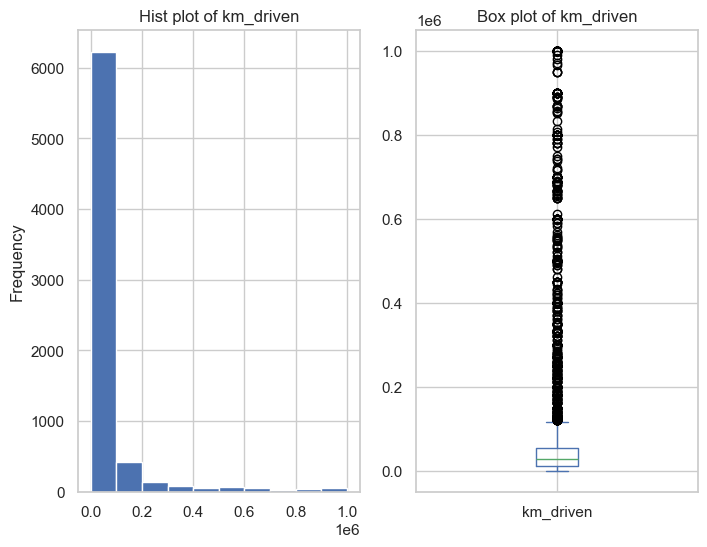

In [39]:
_analyzer.analyze_numeric_variable('km_driven', df_input_numeric)

=====
central tendency of age: {'mean': np.float64(11.299803866629308), 'median': np.float64(10.0), 'mode': np.int64(6), 'min': np.int64(0), 'max': np.int64(46), 'range': np.int64(46)}
=====
Dispersion of age: 
 {'range': np.int64(46), 'q1': np.float64(6.0), 'q3': np.float64(15.0), 'iqr': np.float64(9.0), 'var': np.float64(62.32400444520293), 'skew': np.float64(1.4520487699965063), 'kurtosis': np.float64(3.487431902280354)}
=====


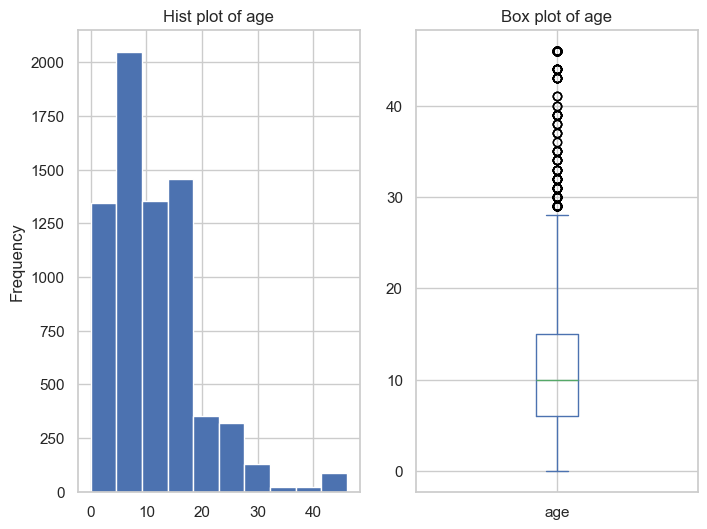

In [40]:
_analyzer.analyze_numeric_variable('age', df_input_numeric)

=====
central tendency of price: {'mean': np.float64(49.279602066405154), 'median': np.float64(16.5), 'mode': np.float64(25.0), 'min': np.float64(0.0), 'max': np.float64(136000.0), 'range': np.float64(136000.0)}
=====
Dispersion of price: 
 {'range': np.float64(136000.0), 'q1': np.float64(8.5), 'q3': np.float64(32.5), 'iqr': np.float64(24.0), 'var': np.float64(2594296.8079755018), 'skew': np.float64(84.28105768562554), 'kurtosis': np.float64(7114.644033820894)}
=====


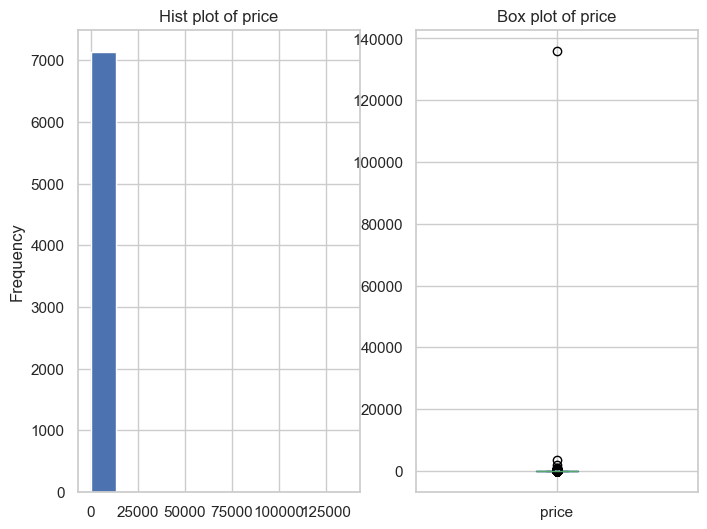

In [41]:
_analyzer.analyze_numeric_variable('price', df_output)

1. Có nhiều giá trị ngoại lai. Cần kiểm tra loại bỏ
2. Só km đã đi cũng có xu hướng phân phối lệch phải
3. Phân phối tuổi xe cũng lệch phải

## 5. Detect Outlier and treatment

### 5.1: Keep all outlier

In [42]:
df_keep_outlier =pd.concat([df_input_numeric, df_input_category, df_output], axis=1)

In [43]:
df_keep_outlier.shape

(7138, 9)

In [44]:
df_keep_outlier.to_csv("data_keep_outlier.csv", index=False)

### 5.2 Remove all oulier

In [45]:
for col in df_input_numeric.columns:
  Q1 = df_input_numeric[col].quantile(0.25)
  Q3 = df_input_numeric[col].quantile(0.75)
  IQR = Q3 - Q1
  upper_limit = Q3 + 1.5*IQR
  lower_limit = Q1 - 1.5*IQR
  lower_outliers = df_input_numeric[df_input_numeric[col] < lower_limit].shape[0] / df_input_numeric.shape[0] * 100
  upper_outliers = df_input_numeric[df_input_numeric[col] > upper_limit].shape[0] / df_input_numeric.shape[0] * 100

  print(f'variable {col} have {round(upper_outliers,3)}% upper outlier')
  print(f'variable {col} have {round(lower_outliers,3)}% lower outlier')

variable km_driven have 9.148% upper outlier
variable km_driven have 0.0% lower outlier
variable age have 3.166% upper outlier
variable age have 0.0% lower outlier


- Xác định tỉ lệ ngoại lai

In [46]:
total_outlier = pd.Series([False] * len(df), index=df_input_numeric.index)
for col in df_input_numeric.columns:
    Q1 = df_input_numeric[col].quantile(0.25)
    Q3 = df_input_numeric[col].quantile(0.75)
    IQR = Q3 - Q1
    upper_limit = Q3 + 1.5*IQR
    lower_limit = Q1 - 1.5*IQR
    col_outliers = (df_input_numeric[col] < lower_limit) | (df_input_numeric[col] > upper_limit)
    total_outlier |= col_outliers 
total_outlier.sum()

np.int64(854)

- Tìm số lượng giá trị ngoại lai

In [47]:
df_remove_outlier = pd.concat([df_input_numeric, df_input_category, df_output], axis=1)
for col in df_input_numeric.columns:
  Q1 = df_input_numeric[col].quantile(0.25)
  Q3 = df_input_numeric[col].quantile(0.75)
  IQR = Q3 - Q1
  upper_limit = Q3 + 1.5*IQR
  lower_limit = Q1 - 1.5*IQR
  outlier_index = df_remove_outlier[(df_remove_outlier[col] > upper_limit) | (df_remove_outlier[col] < lower_limit)].index
  df_remove_outlier = df_remove_outlier.drop(outlier_index)

In [48]:
df_remove_outlier = df_remove_outlier[df_remove_outlier['price'].between(1, 500)]

- Lại bỏ các khoảng giá bất thường

In [49]:
df_remove_outlier.shape

(6232, 9)

- Tạo dataframe mới đã loại bỏ ngoại lai


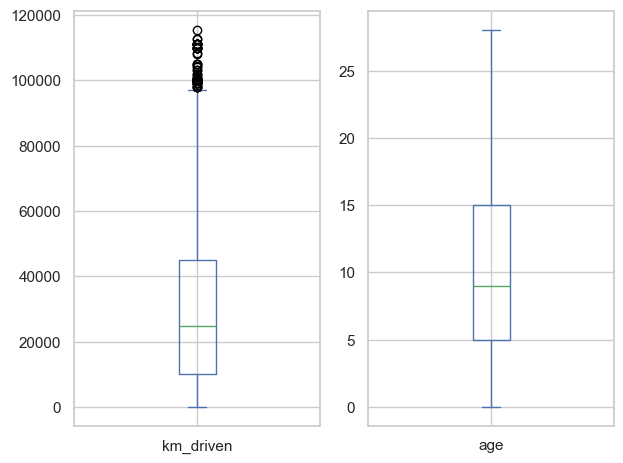

In [50]:
plt.subplot(1,2,1)
df_remove_outlier.km_driven.plot.box()
plt.subplot(1,2,2)
df_remove_outlier.age.plot.box()
plt.tight_layout()
plt.show()

- Quan sát các feature sau khi loại bỏ outlier

In [51]:
df_remove_outlier.to_csv("data_remove_outlier.csv", index=False)

## 6. Features Engineering

In [52]:
df_remove_outlier["price_log"] = np.log1p(df_remove_outlier["price"])
df_keep_outlier["price_log"] = np.log1p(df_keep_outlier["price"])

- Dùng log phân bố ngoại lai rất nặng

In [53]:
numeric_features = ['km_driven', 'age']
categorical_features = ['brand', 'model', 'engine_capacity', 'vehicle_type', 'origin', 'location']
target = 'price_log'

In [54]:
numeric_transformer = RobustScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

- Dùng robust để xử lý cho các biến có ngoại lệ.

## 7. Build model

In [55]:
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "SVR": SVR()
}

In [56]:
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)

    return r2, rmse, mae

In [57]:
def run_experiments(df, df_name):
    print(f"\n------ Running Models on {df_name} ------\n")

    X = df[numeric_features + categorical_features]
    y = df[target]

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    results = []
    trained_models = {}

    for name, model in models.items():
        pipeline = Pipeline(steps=[
            ('preprocess', preprocessor),
            ('model', model)
        ])

        pipeline.fit(X_train, y_train)
        y_pred = pipeline.predict(X_test)

        r2 = r2_score(y_test, y_pred)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        mae = mean_absolute_error(y_test, y_pred)

        results.append((name, r2, rmse, mae))
        trained_models[name] = pipeline

        print(f"{name:20} | R²: {r2:.4f} | RMSE: {rmse:.4f} | MAE: {mae:.4f}")

    result_df = pd.DataFrame(results, columns=["Model", "R²", "RMSE", "MAE"])
    result_df = result_df.sort_values(by="R²", ascending=False)

    return result_df, trained_models,  X_test, y_test

### 7.1 Outliers data

In [58]:
results_keep_outlier, trained_models_keep, X_test, y_test = run_experiments(df_keep_outlier, "Keep Outlier Data")


------ Running Models on Keep Outlier Data ------

Linear Regression    | R²: 0.5001 | RMSE: 0.6931 | MAE: 0.4570
Decision Tree        | R²: 0.2613 | RMSE: 0.8425 | MAE: 0.4858
Random Forest        | R²: 0.5697 | RMSE: 0.6430 | MAE: 0.3738
Gradient Boosting    | R²: 0.5493 | RMSE: 0.6581 | MAE: 0.4246
SVR                  | R²: 0.5520 | RMSE: 0.6561 | MAE: 0.3937


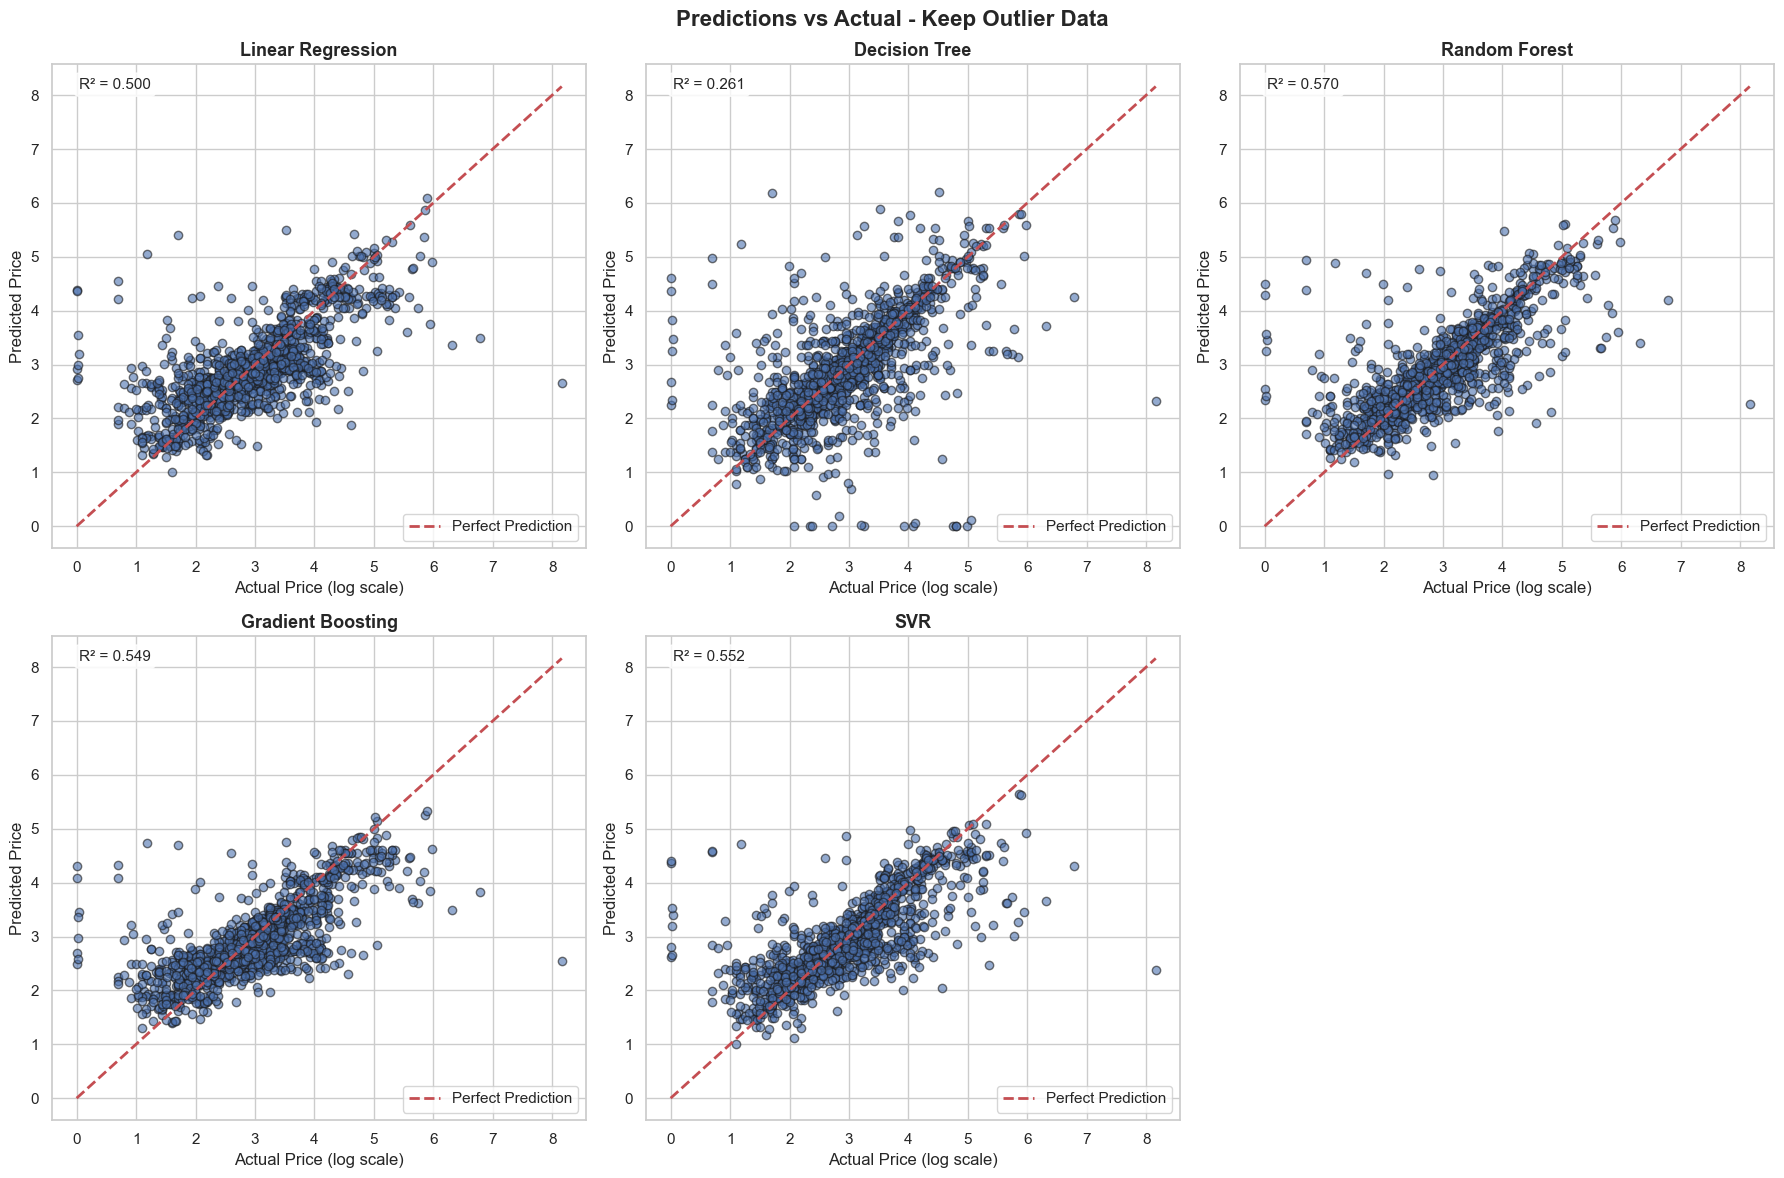

In [59]:
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle("Predictions vs Actual - Keep Outlier Data", fontsize=16, fontweight='bold')

for i, (model_name, model) in enumerate(trained_models_keep.items()):
    y_pred = model.predict(X_test)

    if i < 3:
        ax = axes[0, i]
    else:
        ax = axes[1, i - 3]

    ax.scatter(y_test, y_pred, alpha=0.6, edgecolor='k')

    # Perfect prediction line
    min_val = min(y_test.min(), y_pred.min())
    max_val = max(y_test.max(), y_pred.max())
    ax.plot([min_val, max_val], [min_val, max_val], "r--", lw=2, label="Perfect Prediction")

    ax.set_xlabel("Actual Price (log scale)" if 'log' in target else "Actual Price")
    ax.set_ylabel("Predicted Price")
    ax.set_title(f"{model_name}", fontsize=13, fontweight='bold')
    ax.legend()

    # Add R² score
    r2 = r2_score(y_test, y_pred)
    ax.text(
        0.05, 0.95,
        f"R² = {r2:.3f}",
        transform=ax.transAxes,
        bbox=dict(boxstyle="round", facecolor="white", alpha=0.8),
        fontsize=11
    )

# Hide unused subplots
for i in range(len(trained_models_keep), 6):
    if i < 3:
        axes[0, i].set_visible(False)
    else:
        axes[1, i - 3].set_visible(False)

plt.tight_layout()
plt.show()

### 7.2 Without outlier data

In [60]:
results_remove_outlier, trained_models_remove, X_test, y_test = run_experiments(df_remove_outlier, "Remove Outlier Data")


------ Running Models on Remove Outlier Data ------

Linear Regression    | R²: 0.6761 | RMSE: 0.5436 | MAE: 0.3742
Decision Tree        | R²: 0.5419 | RMSE: 0.6465 | MAE: 0.3940
Random Forest        | R²: 0.7301 | RMSE: 0.4962 | MAE: 0.3090
Gradient Boosting    | R²: 0.7150 | RMSE: 0.5099 | MAE: 0.3567
SVR                  | R²: 0.7573 | RMSE: 0.4706 | MAE: 0.3084


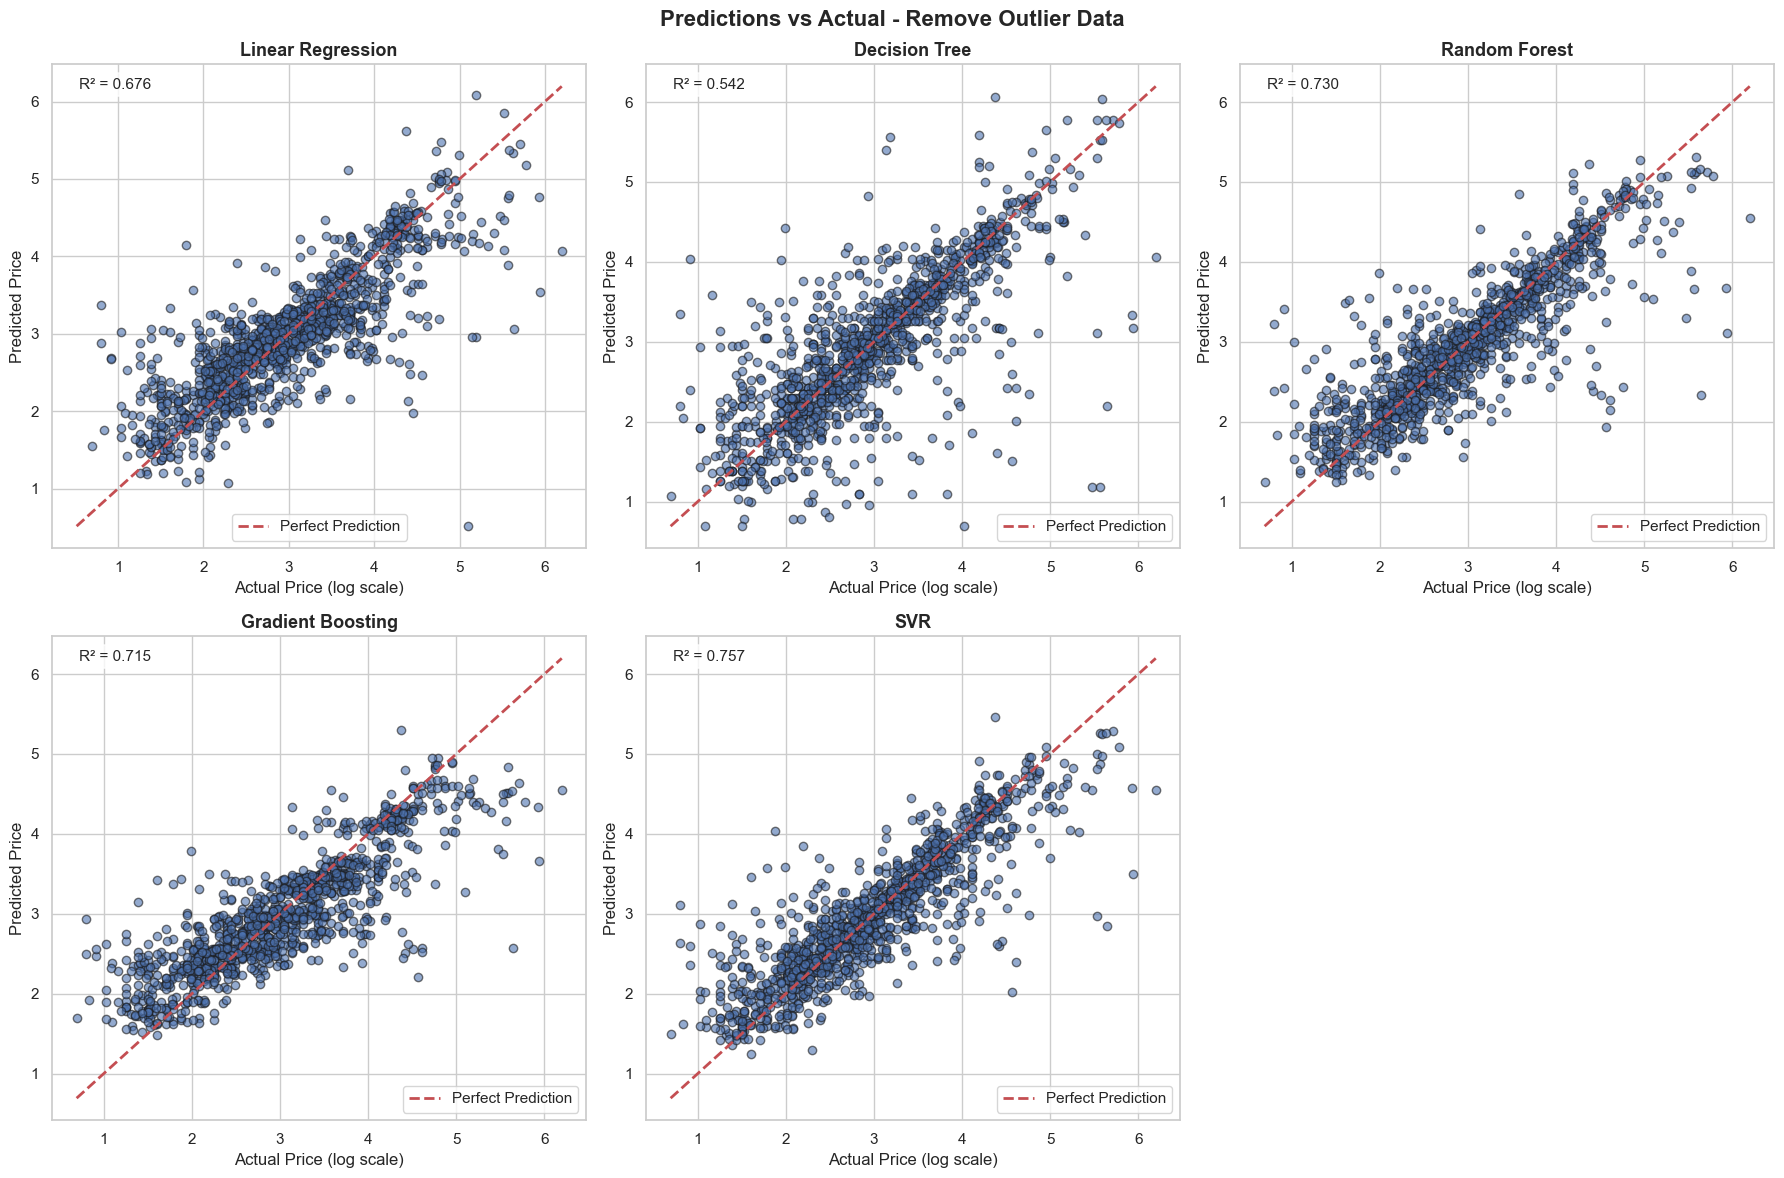

In [61]:
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle("Predictions vs Actual - Remove Outlier Data", fontsize=16, fontweight='bold')

for i, (model_name, model) in enumerate(trained_models_keep.items()):
    y_pred = model.predict(X_test)

    if i < 3:
        ax = axes[0, i]
    else:
        ax = axes[1, i - 3]

    ax.scatter(y_test, y_pred, alpha=0.6, edgecolor='k')

    # Perfect prediction line
    min_val = min(y_test.min(), y_pred.min())
    max_val = max(y_test.max(), y_pred.max())
    ax.plot([min_val, max_val], [min_val, max_val], "r--", lw=2, label="Perfect Prediction")

    ax.set_xlabel("Actual Price (log scale)" if 'log' in target else "Actual Price")
    ax.set_ylabel("Predicted Price")
    ax.set_title(f"{model_name}", fontsize=13, fontweight='bold')
    ax.legend()

    # Add R² score
    r2 = r2_score(y_test, y_pred)
    ax.text(
        0.05, 0.95,
        f"R² = {r2:.3f}",
        transform=ax.transAxes,
        bbox=dict(boxstyle="round", facecolor="white", alpha=0.8),
        fontsize=11
    )

# Hide unused subplots
for i in range(len(trained_models_keep), 6):
    if i < 3:
        axes[0, i].set_visible(False)
    else:
        axes[1, i - 3].set_visible(False)

plt.tight_layout()
plt.show()

### 7.3 Evaluation


========== COMPARISON TABLE ==========

            Model  R²_Keep  R²_Remove  RMSE_Keep  RMSE_Remove  MAE_Keep  MAE_Remove  R²_Diff  RMSE_Diff
    Random Forest 0.569679   0.757277   0.643044     0.470584  0.373814    0.308377 0.187598   0.172460
              SVR 0.551961   0.730109   0.656149     0.496222  0.393671    0.309042 0.178149   0.159928
Gradient Boosting 0.549341   0.715003   0.658065     0.509920  0.424600    0.356663 0.165662   0.148145
Linear Regression 0.500140   0.676114   0.693057     0.543598  0.457020    0.374181 0.175973   0.149458
    Decision Tree 0.261296   0.541914   0.842519     0.646480  0.485773    0.393961 0.280618   0.196039


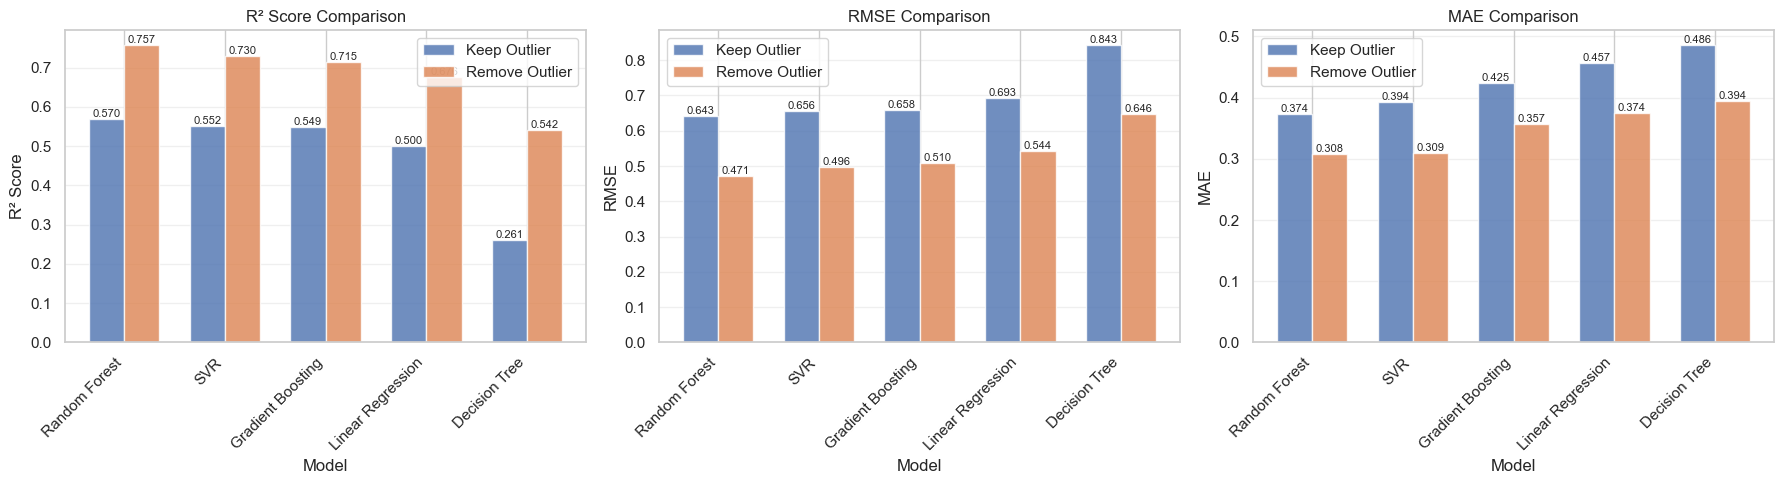


========== BEST MODELS ==========
Best model (Keep Outlier): Random Forest
Best model (Remove Outlier): SVR

Recommendation: Use Remove Outlier dataset with SVR


In [62]:
comparison_df = pd.DataFrame({
    'Model': results_keep_outlier['Model'],
    'R²_Keep': results_keep_outlier['R²'].values,
    'R²_Remove': results_remove_outlier['R²'].values,
    'RMSE_Keep': results_keep_outlier['RMSE'].values,
    'RMSE_Remove': results_remove_outlier['RMSE'].values,
    'MAE_Keep': results_keep_outlier['MAE'].values,
    'MAE_Remove': results_remove_outlier['MAE'].values
})

comparison_df['R²_Diff'] = comparison_df['R²_Remove'] - comparison_df['R²_Keep']
comparison_df['RMSE_Diff'] = comparison_df['RMSE_Keep'] - comparison_df['RMSE_Remove']

print("\n========== COMPARISON TABLE ==========\n")
print(comparison_df.to_string(index=False))

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

x = np.arange(len(comparison_df['Model']))
width = 0.35

bars1 = axes[0].bar(x - width/2, comparison_df['R²_Keep'], width, label='Keep Outlier', alpha=0.8)
bars2 = axes[0].bar(x + width/2, comparison_df['R²_Remove'], width, label='Remove Outlier', alpha=0.8)
axes[0].set_xlabel('Model')
axes[0].set_ylabel('R² Score')
axes[0].set_title('R² Score Comparison')
axes[0].set_xticks(x)
axes[0].set_xticklabels(comparison_df['Model'], rotation=45, ha='right')
axes[0].legend()
axes[0].grid(axis='y', alpha=0.3)
for bar in bars1:
    height = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.3f}', ha='center', va='bottom', fontsize=8)
for bar in bars2:
    height = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.3f}', ha='center', va='bottom', fontsize=8)

bars3 = axes[1].bar(x - width/2, comparison_df['RMSE_Keep'], width, label='Keep Outlier', alpha=0.8)
bars4 = axes[1].bar(x + width/2, comparison_df['RMSE_Remove'], width, label='Remove Outlier', alpha=0.8)
axes[1].set_xlabel('Model')
axes[1].set_ylabel('RMSE')
axes[1].set_title('RMSE Comparison')
axes[1].set_xticks(x)
axes[1].set_xticklabels(comparison_df['Model'], rotation=45, ha='right')
axes[1].legend()
axes[1].grid(axis='y', alpha=0.3)
for bar in bars3:
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.3f}', ha='center', va='bottom', fontsize=8)
for bar in bars4:
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.3f}', ha='center', va='bottom', fontsize=8)

bars5 = axes[2].bar(x - width/2, comparison_df['MAE_Keep'], width, label='Keep Outlier', alpha=0.8)
bars6 = axes[2].bar(x + width/2, comparison_df['MAE_Remove'], width, label='Remove Outlier', alpha=0.8)
axes[2].set_xlabel('Model')
axes[2].set_ylabel('MAE')
axes[2].set_title('MAE Comparison')
axes[2].set_xticks(x)
axes[2].set_xticklabels(comparison_df['Model'], rotation=45, ha='right')
axes[2].legend()
axes[2].grid(axis='y', alpha=0.3)
for bar in bars5:
    height = bar.get_height()
    axes[2].text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.3f}', ha='center', va='bottom', fontsize=8)
for bar in bars6:
    height = bar.get_height()
    axes[2].text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.3f}', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

best_model_keep = results_keep_outlier.iloc[0]['Model']
best_model_remove = results_remove_outlier.iloc[0]['Model']

print(f"\n========== BEST MODELS ==========")
print(f"Best model (Keep Outlier): {best_model_keep}")
print(f"Best model (Remove Outlier): {best_model_remove}")

if comparison_df['R²_Remove'].max() > comparison_df['R²_Keep'].max():
    print(f"\nRecommendation: Use Remove Outlier dataset with {best_model_remove}")
else:
    print(f"\nRecommendation: Use Keep Outlier dataset with {best_model_keep}")

- Mô hình SVR cho kết quả tốt nhất với phương án loại bỏ outliers.

### 7.4 Features important


========== FEATURE IMPORTANCE - Random Forest ==========

                     Feature  Importance
                         age    0.244489
                    model_SH    0.225445
 engine_capacity_Trên 175 cc    0.058579
                   km_driven    0.054738
          vehicle_type_Xe số    0.036045
   vehicle_type_Tay côn/Moto    0.028390
                 brand_Honda    0.022693
               brand_Piaggio    0.021079
               model_Exciter    0.020423
          model_Sport / Xipo    0.015148
           origin_Trung Quốc    0.013026
             origin_Thái Lan    0.012376
engine_capacity_100 - 175 cc    0.011361
             origin_Việt Nam    0.008418
                 model_Vario    0.008306
            origin_Nước khác    0.007237
                model_Future    0.007170
   location_Huyện Bình Chánh    0.006642
                   model_YAZ    0.006637
                brand_Yamaha    0.006405


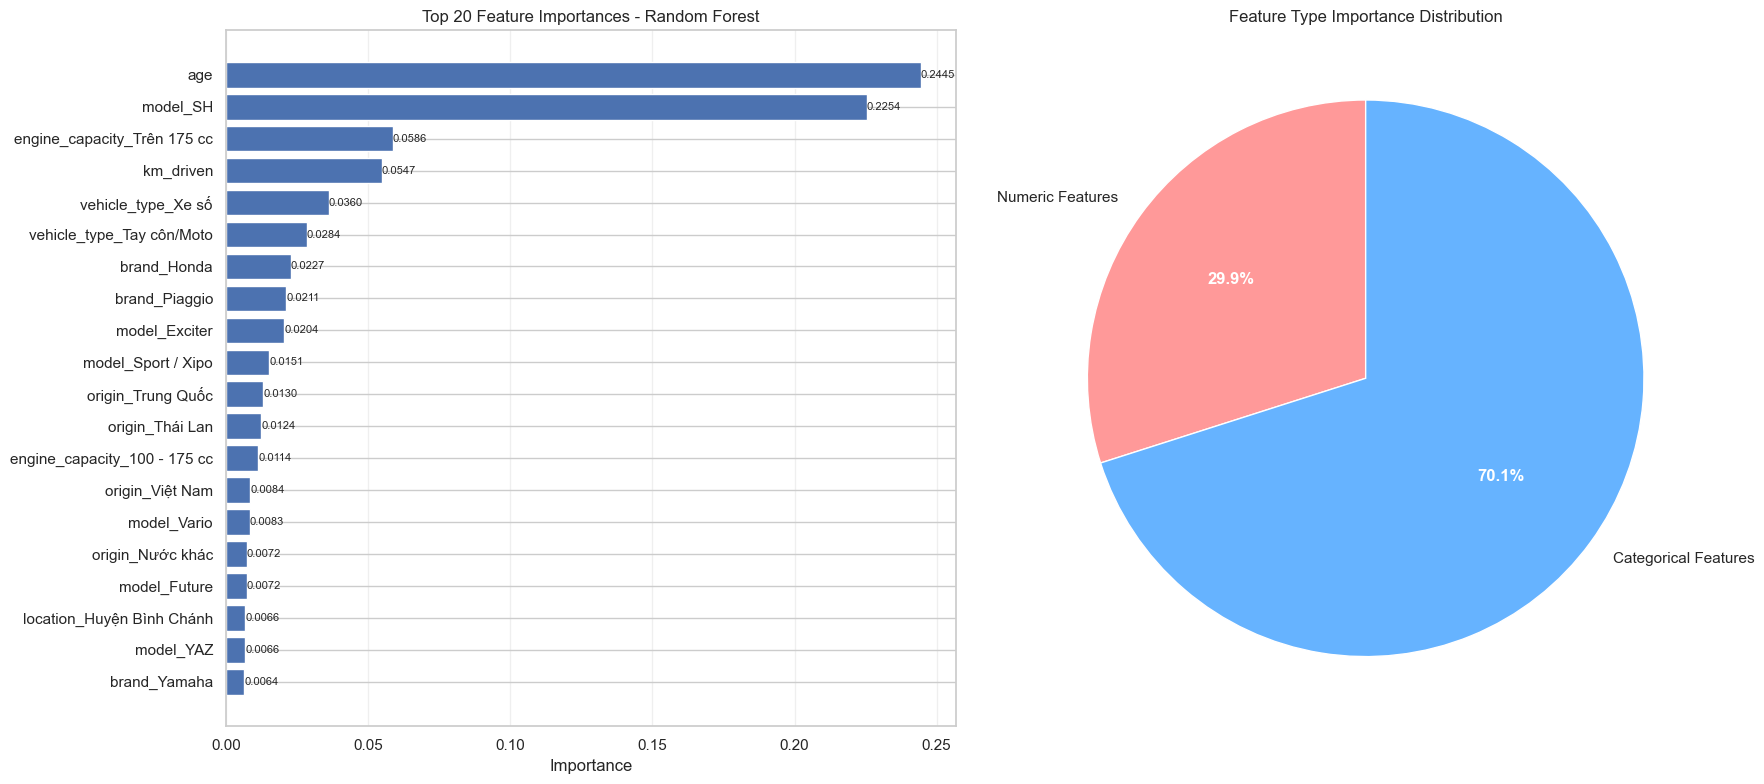


========== FEATURE TYPE SUMMARY ==========

            Category  Total Importance  Count
    Numeric Features          0.299227      2
Categorical Features          0.700773    257

========== CATEGORICAL FEATURE IMPORTANCE ==========


brand: 0.0678
        Feature  Importance
    brand_Honda    0.022693
  brand_Piaggio    0.021079
   brand_Yamaha    0.006405
      brand_SYM    0.004328
brand_Hãng khác    0.003949

model: 0.3621
           Feature  Importance
          model_SH    0.225445
     model_Exciter    0.020423
model_Sport / Xipo    0.015148
       model_Vario    0.008306
      model_Future    0.007170

engine_capacity: 0.0777
                     Feature  Importance
 engine_capacity_Trên 175 cc    0.058579
engine_capacity_100 - 175 cc    0.011361
  engine_capacity_Dưới 50 cc    0.003329
 engine_capacity_50 - 100 cc    0.002918
       engine_capacity_Other    0.001560

vehicle_type: 0.0677
                  Feature  Importance
       vehicle_type_Xe số    0.036045
vehicle_t

In [64]:
best_tree_model_name = 'Random Forest'
best_tree_pipeline = trained_models_remove[best_tree_model_name]

best_model = best_tree_pipeline.named_steps['model']
preprocessor_fitted = best_tree_pipeline.named_steps['preprocess']

feature_names = []
feature_names.extend(numeric_features)

cat_features = preprocessor_fitted.named_transformers_['cat'].get_feature_names_out(categorical_features)
feature_names.extend(cat_features)

importances = best_model.feature_importances_

feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(f"\n========== FEATURE IMPORTANCE - {best_tree_model_name} ==========\n")
print(feature_importance_df.head(20).to_string(index=False))

fig, axes = plt.subplots(1, 2, figsize=(18, 8))

top_n = 20
top_features = feature_importance_df.head(top_n)

bars = axes[0].barh(range(len(top_features)), top_features['Importance'])
axes[0].set_yticks(range(len(top_features)))
axes[0].set_yticklabels(top_features['Feature'])
axes[0].invert_yaxis()
axes[0].set_xlabel('Importance')
axes[0].set_title(f'Top {top_n} Feature Importances - {best_tree_model_name}')
axes[0].grid(axis='x', alpha=0.3)

for i, bar in enumerate(bars):
    width = bar.get_width()
    axes[0].text(width, bar.get_y() + bar.get_height()/2., 
                f'{width:.4f}', ha='left', va='center', fontsize=8)

numeric_importance = feature_importance_df[feature_importance_df['Feature'].isin(numeric_features)]
categorical_importance = feature_importance_df[~feature_importance_df['Feature'].isin(numeric_features)]

category_summary = pd.DataFrame({
    'Category': ['Numeric Features', 'Categorical Features'],
    'Total Importance': [
        numeric_importance['Importance'].sum(),
        categorical_importance['Importance'].sum()
    ],
    'Count': [
        len(numeric_importance),
        len(categorical_importance)
    ]
})

colors = ['#ff9999', '#66b3ff']
wedges, texts, autotexts = axes[1].pie(category_summary['Total Importance'], 
                                        labels=category_summary['Category'],
                                        autopct='%1.1f%%',
                                        colors=colors,
                                        startangle=90)
axes[1].set_title('Feature Type Importance Distribution')

for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontsize(12)
    autotext.set_weight('bold')

plt.tight_layout()
plt.show()

print("\n========== FEATURE TYPE SUMMARY ==========\n")
print(category_summary.to_string(index=False))

print("\n========== CATEGORICAL FEATURE IMPORTANCE ==========\n")
for cat_feature in categorical_features:
    cat_feature_importance = feature_importance_df[
        feature_importance_df['Feature'].str.startswith(cat_feature + '_')
    ]
    if len(cat_feature_importance) > 0:
        total_importance = cat_feature_importance['Importance'].sum()
        print(f"\n{cat_feature}: {total_importance:.4f}")
        print(cat_feature_importance.head(5).to_string(index=False))

### 7.5 Save Model

In [66]:
import joblib
from datetime import datetime

timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")

best_model_name = results_remove_outlier.iloc[0]['Model']
best_pipeline = trained_models_remove[best_model_name]

model_filename = f'best_model_{best_model_name.replace(" ", "_")}_{timestamp}.pkl'
joblib.dump(best_pipeline, model_filename)

metadata = {
    'model_name': best_model_name,
    'dataset': 'remove_outlier',
    'timestamp': timestamp,
    'metrics': {
        'R2': results_remove_outlier.iloc[0]['R²'],
        'RMSE': results_remove_outlier.iloc[0]['RMSE'],
        'MAE': results_remove_outlier.iloc[0]['MAE']
    },
    'features': {
        'numeric': numeric_features,
        'categorical': categorical_features
    },
    'preprocessing': 'RobustScaler + OneHotEncoder',
    'target': 'price_log (log-transformed)'
}

metadata_filename = f'model_metadata_{timestamp}.pkl'
joblib.dump(metadata, metadata_filename)

print(f"✅ Model saved: {model_filename}")
print(f"✅ Metadata saved: {metadata_filename}")
print(f"\nTo load:")
print(f"model = joblib.load('{model_filename}')")
print(f"metadata = joblib.load('{metadata_filename}')")

✅ Model saved: best_model_SVR_20251122_001211.pkl
✅ Metadata saved: model_metadata_20251122_001211.pkl

To load:
model = joblib.load('best_model_SVR_20251122_001211.pkl')
metadata = joblib.load('model_metadata_20251122_001211.pkl')


## 8. Conclusion (model)

1. Model xe là yếu tố quyết định giá nhất 
    - SH (22.54%) - Chiếm gần 2/3 tầm quan trọng của model
    - SH là dòng xe cao cấp, giá cao và ổn định nhất thị trường
    - Theo sau đó là Exciter (2.04%) - Xe thể thao phổ biến

2. Các thông số kỹ thuật (km, tuổi xe, phân khối) cũng rất quan trọng
    - Phân khối là yếu tố kỹ thuật quan trọng nhất.
3. Honda + Piaggio = 4.38% (64.6% tổng brand importance)

4. Địa lý ảnh hưởng ít hơn

## 9. Anomal detect

- Mục tiêu là phát hiện các bất thường nên chỉ lựa chọn tập dữ liệu không loại bỏ outlier để xây dựng quy luật và mô hình phát hiện.

### 9.1 Business Rules

========== BUSINESS RULE ANOMALIES ==========

Total anomalies detected: 488
Percentage: 6.84%

Breakdown by reason:
reasons
KM > 200,000                 430
Price < 1tr                   47
Price > 500tr                  8
Price < 1tr; KM > 200,000      3
Name: count, dtype: int64

Sample anomalies:
         brand                    model      price  km_driven  age  \
15   Hãng khác                Dòng khác   6.000000     300000   24   
22       Honda                     Wave   9.000000     450000   10   
63     Triumph  Triumph Bonneville T100   0.000370       8900    1   
66       Honda                    Vario   0.000001      81000    6   
87       Honda                     Wave   9.500000     666666   19   
106     Yamaha                  Exciter  33.000000     280000    3   
120        KTM                 Duke 200  37.000000     229000    3   
134      Honda                     Wave   7.900000     500000   12   
135     Yamaha                    Nouvo   9.000000     267890   12  

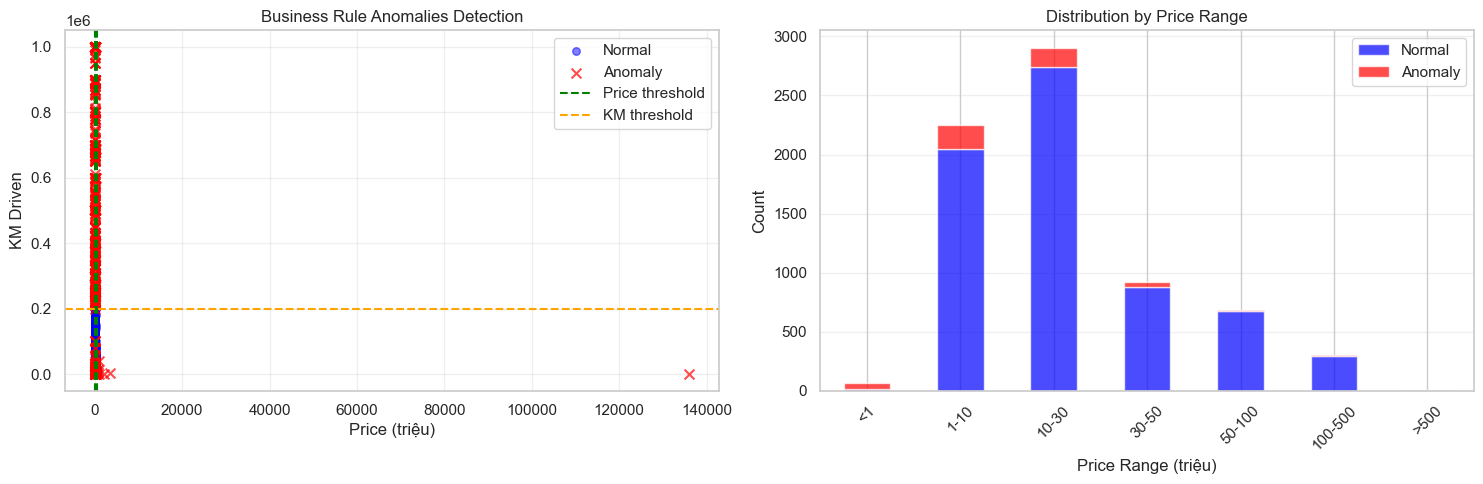

In [67]:
def detect_business_rule_anomalies(df):
    anomalies = pd.DataFrame(index=df.index)
    anomalies['is_anomaly'] = False
    anomalies['reasons'] = ''
    
    price_low = df['price'] < 1
    price_high = df['price'] > 500
    km_high = df['km_driven'] > 200000
    
    anomalies.loc[price_low, 'is_anomaly'] = True
    anomalies.loc[price_low, 'reasons'] += 'Price < 1tr; '
    
    anomalies.loc[price_high, 'is_anomaly'] = True
    anomalies.loc[price_high, 'reasons'] += 'Price > 500tr; '
    
    anomalies.loc[km_high, 'is_anomaly'] = True
    anomalies.loc[km_high, 'reasons'] += 'KM > 200,000; '
    
    anomalies['reasons'] = anomalies['reasons'].str.rstrip('; ')
    
    return anomalies

business_anomalies = detect_business_rule_anomalies(df_keep_outlier)

print("========== BUSINESS RULE ANOMALIES ==========\n")
print(f"Total anomalies detected: {business_anomalies['is_anomaly'].sum()}")
print(f"Percentage: {business_anomalies['is_anomaly'].sum() / len(df_keep_outlier) * 100:.2f}%")

reason_counts = business_anomalies[business_anomalies['is_anomaly']]['reasons'].value_counts()
print("\nBreakdown by reason:")
print(reason_counts)

anomaly_samples = df_keep_outlier[business_anomalies['is_anomaly']].copy()
anomaly_samples['reason'] = business_anomalies.loc[business_anomalies['is_anomaly'], 'reasons'].values

print("\nSample anomalies:")
print(anomaly_samples[['brand', 'model', 'price', 'km_driven', 'age', 'reason']].head(10))

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

axes[0].scatter(df_keep_outlier[~business_anomalies['is_anomaly']]['price'], 
               df_keep_outlier[~business_anomalies['is_anomaly']]['km_driven'],
               alpha=0.5, s=30, label='Normal', c='blue')
axes[0].scatter(df_keep_outlier[business_anomalies['is_anomaly']]['price'], 
               df_keep_outlier[business_anomalies['is_anomaly']]['km_driven'],
               alpha=0.7, s=50, label='Anomaly', c='red', marker='x')
axes[0].axvline(x=1, color='green', linestyle='--', label='Price threshold')
axes[0].axvline(x=500, color='green', linestyle='--')
axes[0].axhline(y=200000, color='orange', linestyle='--', label='KM threshold')
axes[0].set_xlabel('Price (triệu)')
axes[0].set_ylabel('KM Driven')
axes[0].set_title('Business Rule Anomalies Detection')
axes[0].legend()
axes[0].grid(alpha=0.3)

price_bins = [0, 1, 10, 30, 50, 100, 500, 1000]
price_labels = ['<1', '1-10', '10-30', '30-50', '50-100', '100-500', '>500']
df_temp = df_keep_outlier.copy()
df_temp['price_range'] = pd.cut(df_temp['price'], bins=price_bins, labels=price_labels)
df_temp['is_anomaly'] = business_anomalies['is_anomaly']

price_range_counts = df_temp.groupby('price_range')['is_anomaly'].agg(['sum', 'count'])
price_range_counts['normal'] = price_range_counts['count'] - price_range_counts['sum']

price_range_counts[['normal', 'sum']].plot(kind='bar', stacked=True, 
                                            color=['blue', 'red'], 
                                            ax=axes[1], alpha=0.7)
axes[1].set_xlabel('Price Range (triệu)')
axes[1].set_ylabel('Count')
axes[1].set_title('Distribution by Price Range')
axes[1].legend(['Normal', 'Anomaly'])
axes[1].grid(axis='y', alpha=0.3)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

df_keep_outlier['business_anomaly'] = business_anomalies['is_anomaly'].astype(int)
df_keep_outlier['business_reason'] = business_anomalies['reasons']

- Sử dụng business rule làm lớp lọc đầu tiên
1. Xe có giá dưới 1tr (rao bán giá mồi để liên hệ trực tiếp) và trên 500tr được xem là bất thường. Do đa phần xe cũ, có trường hợp xe cổ thì giá cũng khá cao và thường trong giới xe cổ mới rao với mức giá cao chứ ít khi đưa lên sàn như này, dân chơi xe sẽ có hội nhóm và clb để kết nối và uy tín.
2. Bổ sung lớp lọc xe đi trên 200000 km (bất thường)

### 9.2 Modified Z-score


price:
  Median: 16.50
  MAD: 9.70
  Outliers (|z| > 5): 391 (5.48%)

km_driven:
  Median: 28000.00
  MAD: 20000.00
  Outliers (|z| > 5): 508 (7.12%)

age:
  Median: 10.00
  MAD: 5.00
  Outliers (|z| > 5): 0 (0.00%)

========== MODIFIED Z-SCORE ANOMALIES ==========

Total anomalies detected: 882
Percentage: 12.36%

Z-score distribution:
Max Z-score: 9455.76
Mean Z-score: 4.33
Median Z-score: 1.21

Sample anomalies (sorted by z-score):
                brand      model     price  km_driven  age   max_zscore  \
4238            Honda         SH  136000.0       1092    3  9455.759871   
6444            Honda  Air Blade    3500.0       3000   17   242.228943   
3229           Yamaha        YAZ    2000.0         20    9   137.924820   
1562          Piaggio      Vespa     890.0          0    2    60.739768   
5194  Harley Davidson    Touring     886.0      40000    6    60.461624   
5425              BMW   R nine T     700.0      12000    2    47.527912   
5841            Honda         SH   

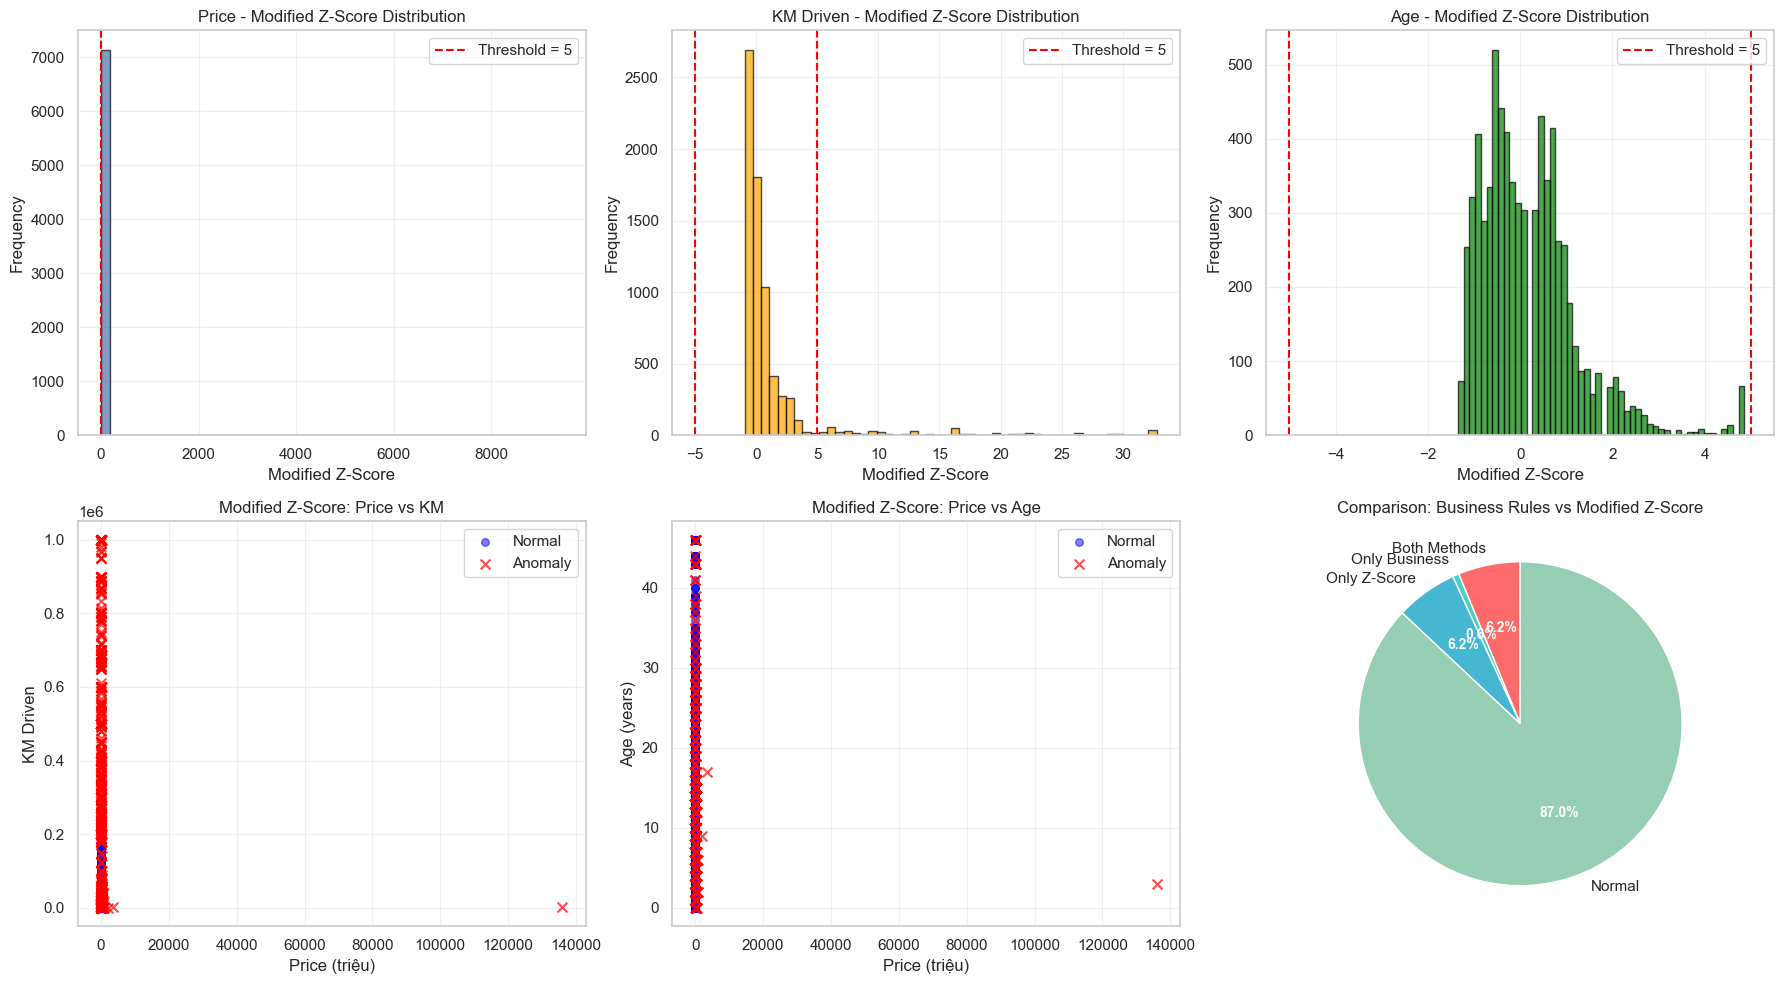


========== COMPARISON WITH BUSINESS RULES ==========

Both methods detect: 442 (6.19%)
Only Business Rules: 46 (0.64%)
Only Modified Z-Score: 440 (6.16%)
Normal by both: 6210 (87.00%)


In [68]:
from scipy import stats

def modified_zscore(data):
    median = np.median(data)
    mad = np.median(np.abs(data - median))
    modified_z = 0.6745 * (data - median) / mad if mad != 0 else np.zeros(len(data))
    return modified_z

def detect_modified_zscore_anomalies(df, features=['price', 'km_driven', 'age'], threshold=5):
    anomalies = pd.DataFrame(index=df.index)
    anomalies['is_anomaly'] = False
    anomalies['reasons'] = ''
    anomalies['max_zscore'] = 0.0
    
    for feature in features:
        z_scores = modified_zscore(df[feature].values)
        is_outlier = np.abs(z_scores) > threshold
        
        anomalies.loc[is_outlier, 'is_anomaly'] = True
        anomalies.loc[is_outlier, 'reasons'] += f'{feature} (z={np.abs(z_scores[is_outlier]).mean():.2f}); '
        anomalies['max_zscore'] = np.maximum(anomalies['max_zscore'], np.abs(z_scores))
        
        print(f"\n{feature}:")
        print(f"  Median: {np.median(df[feature]):.2f}")
        print(f"  MAD: {np.median(np.abs(df[feature] - np.median(df[feature]))):.2f}")
        print(f"  Outliers (|z| > {threshold}): {is_outlier.sum()} ({is_outlier.sum()/len(df)*100:.2f}%)")
    
    anomalies['reasons'] = anomalies['reasons'].str.rstrip('; ')
    
    return anomalies

modified_z_anomalies = detect_modified_zscore_anomalies(df_keep_outlier, 
                                                         features=['price', 'km_driven', 'age'], 
                                                         threshold=5)

print("\n========== MODIFIED Z-SCORE ANOMALIES ==========\n")
print(f"Total anomalies detected: {modified_z_anomalies['is_anomaly'].sum()}")
print(f"Percentage: {modified_z_anomalies['is_anomaly'].sum() / len(df_keep_outlier) * 100:.2f}%")

print("\nZ-score distribution:")
print(f"Max Z-score: {modified_z_anomalies['max_zscore'].max():.2f}")
print(f"Mean Z-score: {modified_z_anomalies['max_zscore'].mean():.2f}")
print(f"Median Z-score: {modified_z_anomalies['max_zscore'].median():.2f}")

anomaly_samples = df_keep_outlier[modified_z_anomalies['is_anomaly']].copy()
anomaly_samples['max_zscore'] = modified_z_anomalies.loc[modified_z_anomalies['is_anomaly'], 'max_zscore'].values
anomaly_samples['reason'] = modified_z_anomalies.loc[modified_z_anomalies['is_anomaly'], 'reasons'].values

print("\nSample anomalies (sorted by z-score):")
print(anomaly_samples[['brand', 'model', 'price', 'km_driven', 'age', 'max_zscore', 'reason']].sort_values('max_zscore', ascending=False).head(10))

fig, axes = plt.subplots(2, 3, figsize=(18, 10))

price_z = modified_zscore(df_keep_outlier['price'].values)
axes[0, 0].hist(price_z, bins=50, alpha=0.7, edgecolor='black')
axes[0, 0].axvline(x=5, color='red', linestyle='--', label='Threshold = 5')
axes[0, 0].axvline(x=-5, color='red', linestyle='--')
axes[0, 0].set_xlabel('Modified Z-Score')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Price - Modified Z-Score Distribution')
axes[0, 0].legend()
axes[0, 0].grid(alpha=0.3)

km_z = modified_zscore(df_keep_outlier['km_driven'].values)
axes[0, 1].hist(km_z, bins=50, alpha=0.7, edgecolor='black', color='orange')
axes[0, 1].axvline(x=5, color='red', linestyle='--', label='Threshold = 5')
axes[0, 1].axvline(x=-5, color='red', linestyle='--')
axes[0, 1].set_xlabel('Modified Z-Score')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_title('KM Driven - Modified Z-Score Distribution')
axes[0, 1].legend()
axes[0, 1].grid(alpha=0.3)

age_z = modified_zscore(df_keep_outlier['age'].values)
axes[0, 2].hist(age_z, bins=50, alpha=0.7, edgecolor='black', color='green')
axes[0, 2].axvline(x=5, color='red', linestyle='--', label='Threshold = 5')
axes[0, 2].axvline(x=-5, color='red', linestyle='--')
axes[0, 2].set_xlabel('Modified Z-Score')
axes[0, 2].set_ylabel('Frequency')
axes[0, 2].set_title('Age - Modified Z-Score Distribution')
axes[0, 2].legend()
axes[0, 2].grid(alpha=0.3)

axes[1, 0].scatter(df_keep_outlier[~modified_z_anomalies['is_anomaly']]['price'], 
                  df_keep_outlier[~modified_z_anomalies['is_anomaly']]['km_driven'],
                  alpha=0.5, s=30, label='Normal', c='blue')
axes[1, 0].scatter(df_keep_outlier[modified_z_anomalies['is_anomaly']]['price'], 
                  df_keep_outlier[modified_z_anomalies['is_anomaly']]['km_driven'],
                  alpha=0.7, s=50, label='Anomaly', c='red', marker='x')
axes[1, 0].set_xlabel('Price (triệu)')
axes[1, 0].set_ylabel('KM Driven')
axes[1, 0].set_title('Modified Z-Score: Price vs KM')
axes[1, 0].legend()
axes[1, 0].grid(alpha=0.3)

axes[1, 1].scatter(df_keep_outlier[~modified_z_anomalies['is_anomaly']]['price'], 
                  df_keep_outlier[~modified_z_anomalies['is_anomaly']]['age'],
                  alpha=0.5, s=30, label='Normal', c='blue')
axes[1, 1].scatter(df_keep_outlier[modified_z_anomalies['is_anomaly']]['price'], 
                  df_keep_outlier[modified_z_anomalies['is_anomaly']]['age'],
                  alpha=0.7, s=50, label='Anomaly', c='red', marker='x')
axes[1, 1].set_xlabel('Price (triệu)')
axes[1, 1].set_ylabel('Age (years)')
axes[1, 1].set_title('Modified Z-Score: Price vs Age')
axes[1, 1].legend()
axes[1, 1].grid(alpha=0.3)

overlap = (df_keep_outlier['business_anomaly'] == 1) & (modified_z_anomalies['is_anomaly'] == True)
only_business = (df_keep_outlier['business_anomaly'] == 1) & (modified_z_anomalies['is_anomaly'] == False)
only_zscore = (df_keep_outlier['business_anomaly'] == 0) & (modified_z_anomalies['is_anomaly'] == True)
both_normal = (df_keep_outlier['business_anomaly'] == 0) & (modified_z_anomalies['is_anomaly'] == False)

comparison_data = {
    'Both Methods': overlap.sum(),
    'Only Business': only_business.sum(),
    'Only Z-Score': only_zscore.sum(),
    'Normal': both_normal.sum()
}

colors_pie = ['#ff6b6b', '#4ecdc4', '#45b7d1', '#96ceb4']
wedges, texts, autotexts = axes[1, 2].pie(comparison_data.values(), 
                                           labels=comparison_data.keys(),
                                           autopct='%1.1f%%',
                                           colors=colors_pie,
                                           startangle=90)
axes[1, 2].set_title('Comparison: Business Rules vs Modified Z-Score')

for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontsize(10)
    autotext.set_weight('bold')

plt.tight_layout()
plt.show()

print("\n========== COMPARISON WITH BUSINESS RULES ==========\n")
print(f"Both methods detect: {overlap.sum()} ({overlap.sum()/len(df_keep_outlier)*100:.2f}%)")
print(f"Only Business Rules: {only_business.sum()} ({only_business.sum()/len(df_keep_outlier)*100:.2f}%)")
print(f"Only Modified Z-Score: {only_zscore.sum()} ({only_zscore.sum()/len(df_keep_outlier)*100:.2f}%)")
print(f"Normal by both: {both_normal.sum()} ({both_normal.sum()/len(df_keep_outlier)*100:.2f}%)")

df_keep_outlier['modified_z_anomaly'] = modified_z_anomalies['is_anomaly'].astype(int)
df_keep_outlier['modified_z_score'] = modified_z_anomalies['max_zscore']

1. Dùng z score để phân loại các xe có giá bất thường. 
2. Dùng Modified Z-score: để tìm tiếp (ít bị ảnh hưởng do giá cực đoan - Sử dụng median thay vì mean → robust hơn với outlier)

- Kết quả lọc ra được các xe có giá bất thường.Tuy nhiên vẫn có hạn chế là chỉ xét 1 chiều. Đôi khi xe sang sẽ có giá cao. Cần phối hợp với các phương pháp khác nữa.



### 9.3 IQR


price:
  Q1: 8.50, Q3: 32.50, IQR: 24.00
  Lower bound: -51.50, Upper bound: 92.50
  Outliers: 357 (5.00%)

km_driven:
  Q1: 10000.00, Q3: 53415.25, IQR: 43415.25
  Lower bound: -98538.12, Upper bound: 161953.38
  Outliers: 517 (7.24%)

age:
  Q1: 6.00, Q3: 15.00, IQR: 9.00
  Lower bound: -16.50, Upper bound: 37.50
  Outliers: 108 (1.51%)

========== IQR ANOMALIES ==========

Total anomalies detected: 953
Percentage: 13.35%

Sample anomalies (sorted by distance):
                brand      model     price  km_driven  age  max_distance  \
4238            Honda         SH  136000.0       1092    3   5668.812500   
6444            Honda  Air Blade    3500.0       3000   17    147.979167   
3229           Yamaha        YAZ    2000.0         20    9     85.479167   
1562          Piaggio      Vespa     890.0          0    2     39.229167   
5194  Harley Davidson    Touring     886.0      40000    6     39.062500   
5425              BMW   R nine T     700.0      12000    2     31.312500   

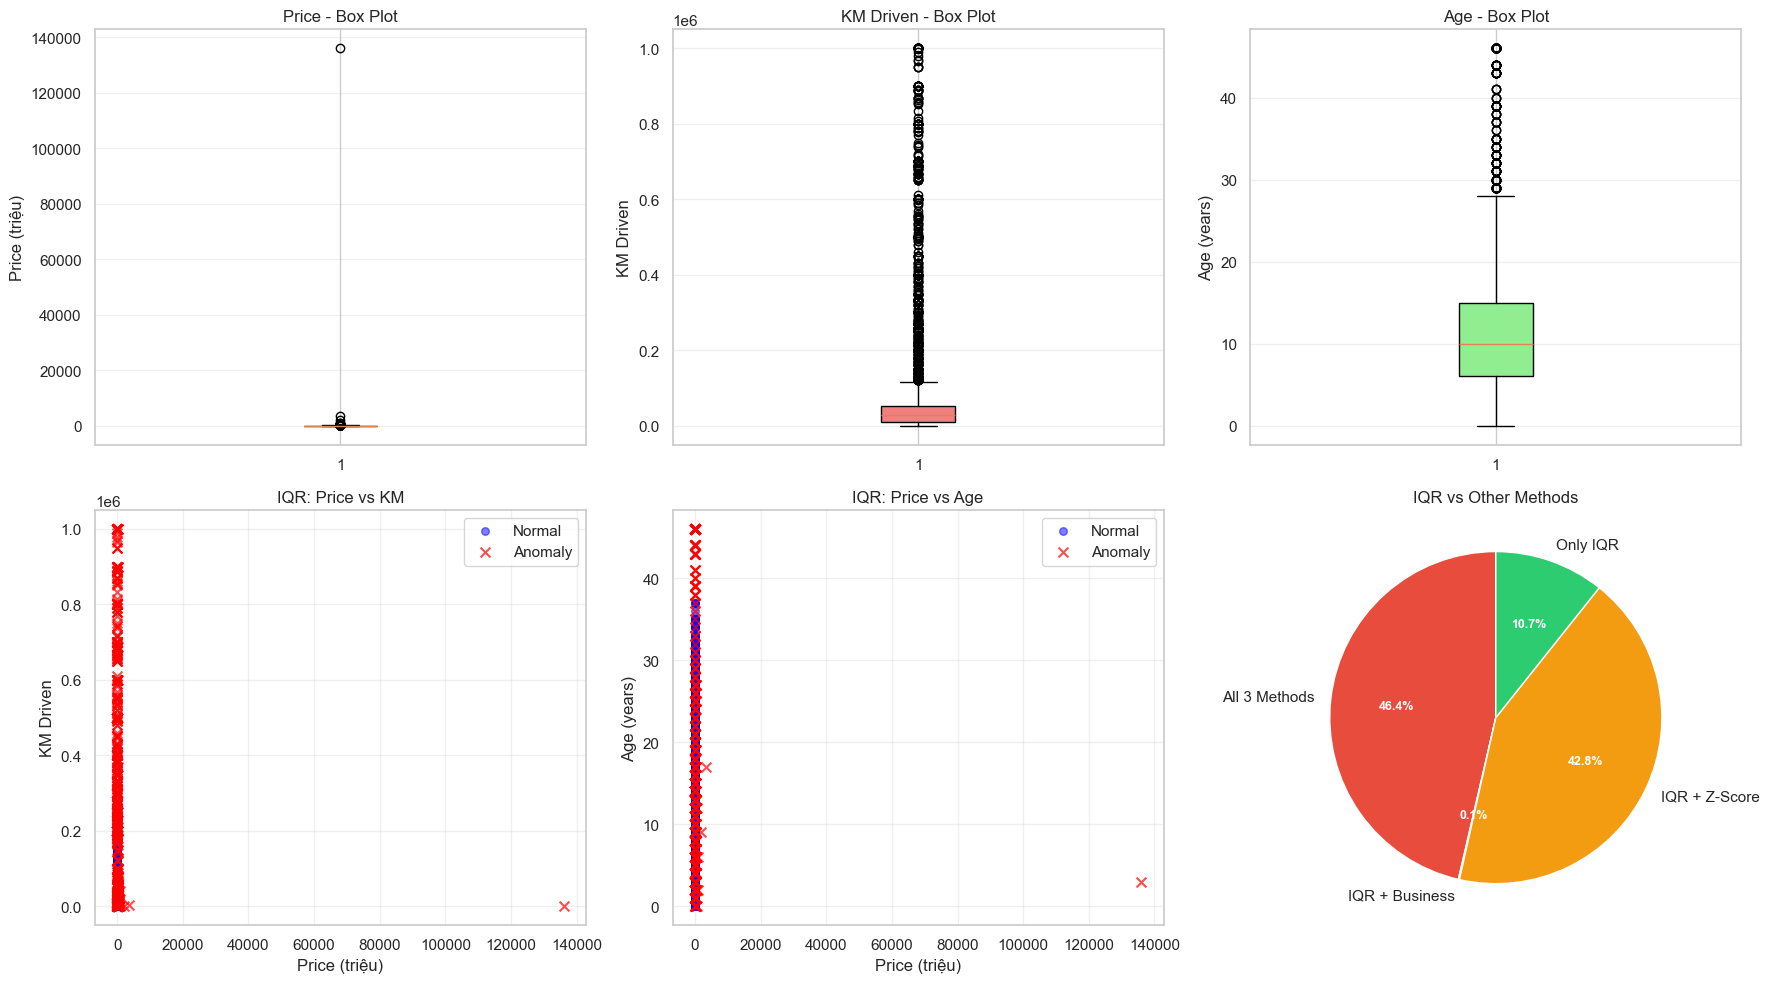


========== COMPARISON WITH OTHER METHODS ==========

All 3 methods detect: 442 (6.19%)
IQR + Business Rules: 443 (6.21%)
IQR + Modified Z-Score: 850 (11.91%)
Only IQR: 102 (1.43%)


In [69]:
def detect_iqr_anomalies(df, features=['price', 'km_driven', 'age'], multiplier=2.5):
    anomalies = pd.DataFrame(index=df.index)
    anomalies['is_anomaly'] = False
    anomalies['reasons'] = ''
    anomalies['max_distance'] = 0.0
    
    for feature in features:
        Q1 = df[feature].quantile(0.25)
        Q3 = df[feature].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - multiplier * IQR
        upper_bound = Q3 + multiplier * IQR
        
        is_outlier = (df[feature] < lower_bound) | (df[feature] > upper_bound)
        
        distance_from_bounds = np.maximum(
            np.abs(df[feature] - lower_bound),
            np.abs(df[feature] - upper_bound)
        ) / IQR
        
        anomalies.loc[is_outlier, 'is_anomaly'] = True
        anomalies.loc[is_outlier, 'reasons'] += f'{feature} (bounds: {lower_bound:.0f}-{upper_bound:.0f}); '
        anomalies['max_distance'] = np.maximum(anomalies['max_distance'], distance_from_bounds)
        
        print(f"\n{feature}:")
        print(f"  Q1: {Q1:.2f}, Q3: {Q3:.2f}, IQR: {IQR:.2f}")
        print(f"  Lower bound: {lower_bound:.2f}, Upper bound: {upper_bound:.2f}")
        print(f"  Outliers: {is_outlier.sum()} ({is_outlier.sum()/len(df)*100:.2f}%)")
    
    anomalies['reasons'] = anomalies['reasons'].str.rstrip('; ')
    
    return anomalies

iqr_anomalies = detect_iqr_anomalies(df_keep_outlier, 
                                     features=['price', 'km_driven', 'age'], 
                                     multiplier=2.5)

print("\n========== IQR ANOMALIES ==========\n")
print(f"Total anomalies detected: {iqr_anomalies['is_anomaly'].sum()}")
print(f"Percentage: {iqr_anomalies['is_anomaly'].sum() / len(df_keep_outlier) * 100:.2f}%")

anomaly_samples = df_keep_outlier[iqr_anomalies['is_anomaly']].copy()
anomaly_samples['max_distance'] = iqr_anomalies.loc[iqr_anomalies['is_anomaly'], 'max_distance'].values
anomaly_samples['reason'] = iqr_anomalies.loc[iqr_anomalies['is_anomaly'], 'reasons'].values

print("\nSample anomalies (sorted by distance):")
print(anomaly_samples[['brand', 'model', 'price', 'km_driven', 'age', 'max_distance', 'reason']].sort_values('max_distance', ascending=False).head(10))

fig, axes = plt.subplots(2, 3, figsize=(18, 10))

bp1 = axes[0, 0].boxplot(df_keep_outlier['price'], vert=True, patch_artist=True)
bp1['boxes'][0].set_facecolor('lightblue')
axes[0, 0].set_ylabel('Price (triệu)')
axes[0, 0].set_title('Price - Box Plot')
axes[0, 0].grid(axis='y', alpha=0.3)

bp2 = axes[0, 1].boxplot(df_keep_outlier['km_driven'], vert=True, patch_artist=True)
bp2['boxes'][0].set_facecolor('lightcoral')
axes[0, 1].set_ylabel('KM Driven')
axes[0, 1].set_title('KM Driven - Box Plot')
axes[0, 1].grid(axis='y', alpha=0.3)

bp3 = axes[0, 2].boxplot(df_keep_outlier['age'], vert=True, patch_artist=True)
bp3['boxes'][0].set_facecolor('lightgreen')
axes[0, 2].set_ylabel('Age (years)')
axes[0, 2].set_title('Age - Box Plot')
axes[0, 2].grid(axis='y', alpha=0.3)

axes[1, 0].scatter(df_keep_outlier[~iqr_anomalies['is_anomaly']]['price'], 
                  df_keep_outlier[~iqr_anomalies['is_anomaly']]['km_driven'],
                  alpha=0.5, s=30, label='Normal', c='blue')
axes[1, 0].scatter(df_keep_outlier[iqr_anomalies['is_anomaly']]['price'], 
                  df_keep_outlier[iqr_anomalies['is_anomaly']]['km_driven'],
                  alpha=0.7, s=50, label='Anomaly', c='red', marker='x')
axes[1, 0].set_xlabel('Price (triệu)')
axes[1, 0].set_ylabel('KM Driven')
axes[1, 0].set_title('IQR: Price vs KM')
axes[1, 0].legend()
axes[1, 0].grid(alpha=0.3)

axes[1, 1].scatter(df_keep_outlier[~iqr_anomalies['is_anomaly']]['price'], 
                  df_keep_outlier[~iqr_anomalies['is_anomaly']]['age'],
                  alpha=0.5, s=30, label='Normal', c='blue')
axes[1, 1].scatter(df_keep_outlier[iqr_anomalies['is_anomaly']]['price'], 
                  df_keep_outlier[iqr_anomalies['is_anomaly']]['age'],
                  alpha=0.7, s=50, label='Anomaly', c='red', marker='x')
axes[1, 1].set_xlabel('Price (triệu)')
axes[1, 1].set_ylabel('Age (years)')
axes[1, 1].set_title('IQR: Price vs Age')
axes[1, 1].legend()
axes[1, 1].grid(alpha=0.3)

overlap_business = (df_keep_outlier['business_anomaly'] == 1) & (iqr_anomalies['is_anomaly'] == True)
overlap_zscore = (df_keep_outlier['modified_z_anomaly'] == 1) & (iqr_anomalies['is_anomaly'] == True)
all_three = (df_keep_outlier['business_anomaly'] == 1) & (df_keep_outlier['modified_z_anomaly'] == 1) & (iqr_anomalies['is_anomaly'] == True)
only_iqr = (df_keep_outlier['business_anomaly'] == 0) & (df_keep_outlier['modified_z_anomaly'] == 0) & (iqr_anomalies['is_anomaly'] == True)

comparison_data = {
    'All 3 Methods': all_three.sum(),
    'IQR + Business': (overlap_business & ~df_keep_outlier['modified_z_anomaly'].astype(bool)).sum(),
    'IQR + Z-Score': (overlap_zscore & ~df_keep_outlier['business_anomaly'].astype(bool)).sum(),
    'Only IQR': only_iqr.sum()
}

colors_pie = ['#e74c3c', '#3498db', '#f39c12', '#2ecc71']
wedges, texts, autotexts = axes[1, 2].pie(comparison_data.values(), 
                                           labels=comparison_data.keys(),
                                           autopct='%1.1f%%',
                                           colors=colors_pie,
                                           startangle=90)
axes[1, 2].set_title('IQR vs Other Methods')

for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontsize(9)
    autotext.set_weight('bold')

plt.tight_layout()
plt.show()

print("\n========== COMPARISON WITH OTHER METHODS ==========\n")
print(f"All 3 methods detect: {all_three.sum()} ({all_three.sum()/len(df_keep_outlier)*100:.2f}%)")
print(f"IQR + Business Rules: {overlap_business.sum()} ({overlap_business.sum()/len(df_keep_outlier)*100:.2f}%)")
print(f"IQR + Modified Z-Score: {overlap_zscore.sum()} ({overlap_zscore.sum()/len(df_keep_outlier)*100:.2f}%)")
print(f"Only IQR: {only_iqr.sum()} ({only_iqr.sum()/len(df_keep_outlier)*100:.2f}%)")

df_keep_outlier['iqr_anomaly'] = iqr_anomalies['is_anomaly'].astype(int)
df_keep_outlier['iqr_distance'] = iqr_anomalies['max_distance']

### 9.4 Isolation Forest

========== ISOLATION FOREST ANOMALIES ==========

Total anomalies detected: 714
Percentage: 10.00%

Anomaly score distribution:
Max score: 0.7603
Mean score: 0.4221
Median score: 0.3964
Min score (normal): 0.3547

Top anomalies (sorted by score):
          brand         model     price  km_driven  age  anomaly_score
1989  Hãng khác     Dòng khác     188.0     999999    2       0.760319
4238      Honda            SH  136000.0       1092    3       0.750737
4043      Honda            67       3.5     999999   46       0.750352
1085   Kawasaki          Z900     135.0     900000    1       0.746394
4982     Suzuki  Sport / Xipo     210.0     686868   27       0.743531
4698      Honda         Chaly       8.5     999999   41       0.740500
1074      Honda        Vision     120.0     900000    2       0.738857
6551  Hãng khác     Dòng khác       4.8     888000   46       0.736896
3893  Hãng khác     Dòng khác       2.5     999999   35       0.733715
6444      Honda     Air Blade    3500.0    

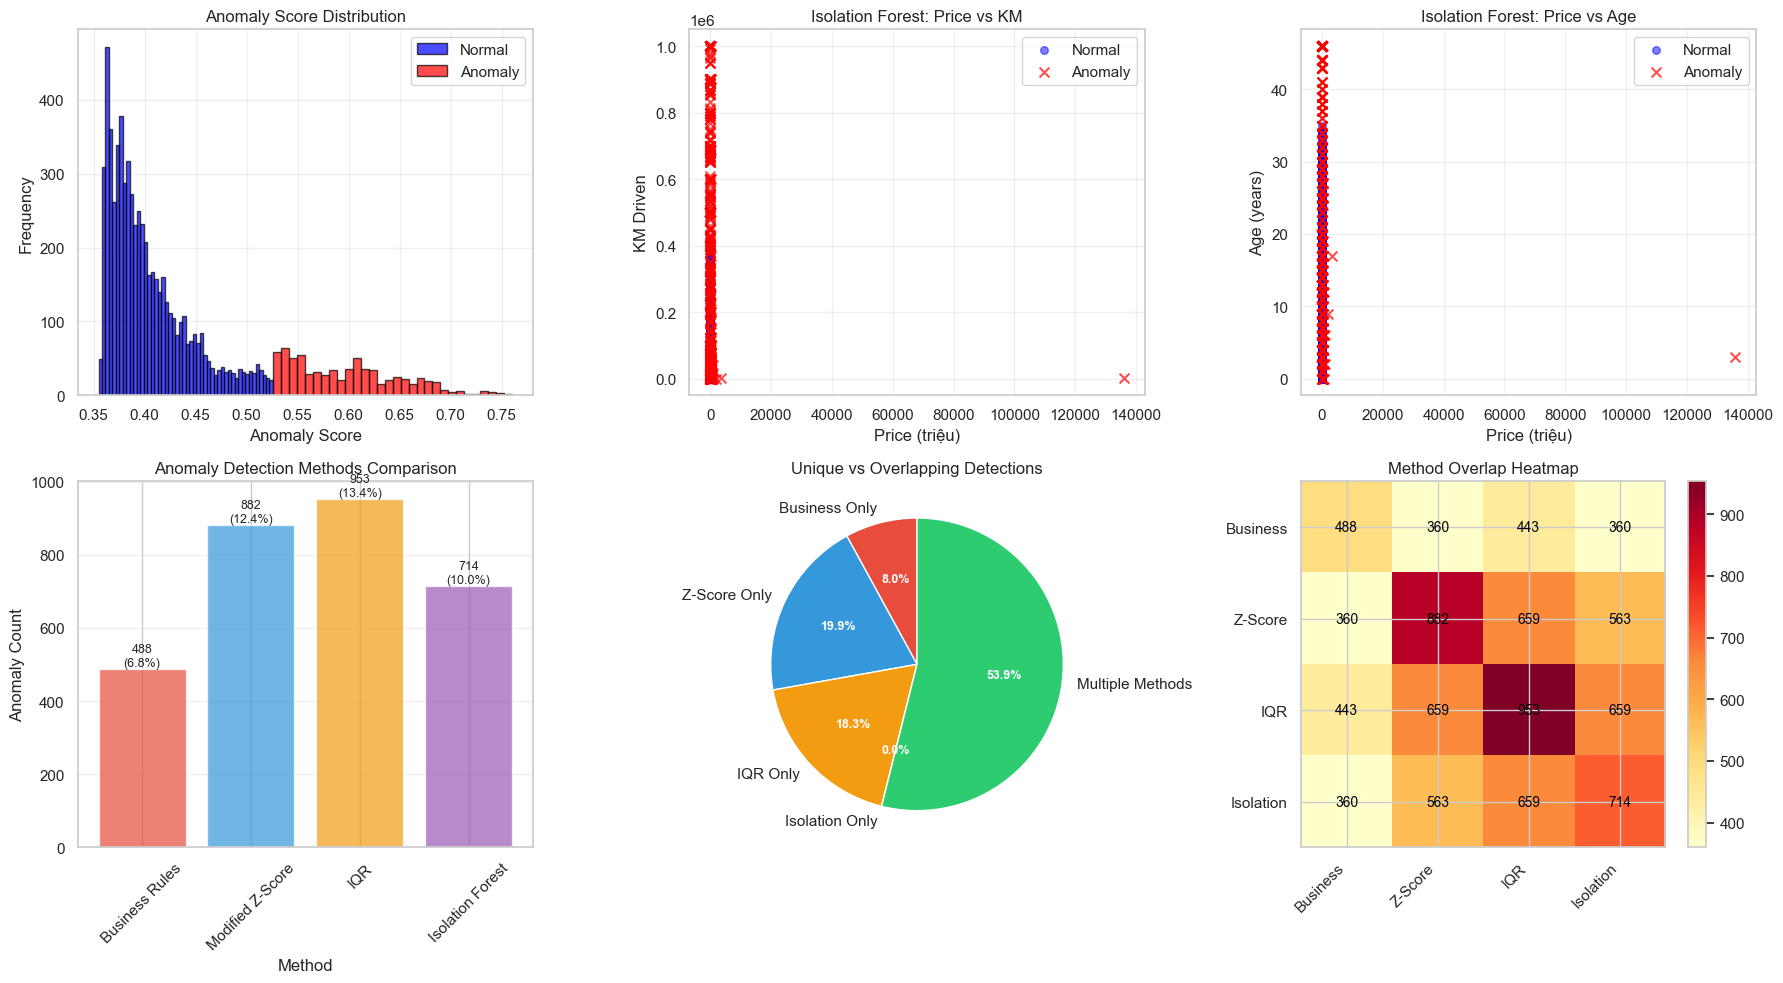

In [70]:
from sklearn.ensemble import IsolationForest

def detect_isolation_forest_anomalies(df, features=['price', 'km_driven', 'age'], 
                                      contamination=0.1, random_state=42):
    X = df[features].values
    
    iso_forest = IsolationForest(
        contamination=contamination,
        random_state=random_state,
        n_estimators=100
    )
    
    predictions = iso_forest.fit_predict(X)
    anomaly_scores = iso_forest.score_samples(X)
    
    anomalies = pd.DataFrame(index=df.index)
    anomalies['is_anomaly'] = (predictions == -1)
    anomalies['anomaly_score'] = -anomaly_scores
    
    return anomalies, iso_forest

isolation_anomalies, iso_model = detect_isolation_forest_anomalies(
    df_keep_outlier, 
    features=['price', 'km_driven', 'age'],
    contamination=0.1
)

print("========== ISOLATION FOREST ANOMALIES ==========\n")
print(f"Total anomalies detected: {isolation_anomalies['is_anomaly'].sum()}")
print(f"Percentage: {isolation_anomalies['is_anomaly'].sum() / len(df_keep_outlier) * 100:.2f}%")

print("\nAnomaly score distribution:")
print(f"Max score: {isolation_anomalies['anomaly_score'].max():.4f}")
print(f"Mean score: {isolation_anomalies['anomaly_score'].mean():.4f}")
print(f"Median score: {isolation_anomalies['anomaly_score'].median():.4f}")
print(f"Min score (normal): {isolation_anomalies['anomaly_score'].min():.4f}")

anomaly_samples = df_keep_outlier[isolation_anomalies['is_anomaly']].copy()
anomaly_samples['anomaly_score'] = isolation_anomalies.loc[isolation_anomalies['is_anomaly'], 'anomaly_score'].values

print("\nTop anomalies (sorted by score):")
print(anomaly_samples[['brand', 'model', 'price', 'km_driven', 'age', 'anomaly_score']].sort_values('anomaly_score', ascending=False).head(15))

fig, axes = plt.subplots(2, 3, figsize=(18, 10))

axes[0, 0].hist(isolation_anomalies[~isolation_anomalies['is_anomaly']]['anomaly_score'], 
               bins=50, alpha=0.7, label='Normal', color='blue', edgecolor='black')
axes[0, 0].hist(isolation_anomalies[isolation_anomalies['is_anomaly']]['anomaly_score'], 
               bins=30, alpha=0.7, label='Anomaly', color='red', edgecolor='black')
axes[0, 0].set_xlabel('Anomaly Score')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Anomaly Score Distribution')
axes[0, 0].legend()
axes[0, 0].grid(alpha=0.3)

axes[0, 1].scatter(df_keep_outlier[~isolation_anomalies['is_anomaly']]['price'], 
                  df_keep_outlier[~isolation_anomalies['is_anomaly']]['km_driven'],
                  alpha=0.5, s=30, label='Normal', c='blue')
axes[0, 1].scatter(df_keep_outlier[isolation_anomalies['is_anomaly']]['price'], 
                  df_keep_outlier[isolation_anomalies['is_anomaly']]['km_driven'],
                  alpha=0.7, s=50, label='Anomaly', c='red', marker='x')
axes[0, 1].set_xlabel('Price (triệu)')
axes[0, 1].set_ylabel('KM Driven')
axes[0, 1].set_title('Isolation Forest: Price vs KM')
axes[0, 1].legend()
axes[0, 1].grid(alpha=0.3)

axes[0, 2].scatter(df_keep_outlier[~isolation_anomalies['is_anomaly']]['price'], 
                  df_keep_outlier[~isolation_anomalies['is_anomaly']]['age'],
                  alpha=0.5, s=30, label='Normal', c='blue')
axes[0, 2].scatter(df_keep_outlier[isolation_anomalies['is_anomaly']]['price'], 
                  df_keep_outlier[isolation_anomalies['is_anomaly']]['age'],
                  alpha=0.7, s=50, label='Anomaly', c='red', marker='x')
axes[0, 2].set_xlabel('Price (triệu)')
axes[0, 2].set_ylabel('Age (years)')
axes[0, 2].set_title('Isolation Forest: Price vs Age')
axes[0, 2].legend()
axes[0, 2].grid(alpha=0.3)

overlap_business = (df_keep_outlier['business_anomaly'] == 1) & (isolation_anomalies['is_anomaly'] == True)
overlap_zscore = (df_keep_outlier['modified_z_anomaly'] == 1) & (isolation_anomalies['is_anomaly'] == True)
overlap_iqr = (df_keep_outlier['iqr_anomaly'] == 1) & (isolation_anomalies['is_anomaly'] == True)
all_four = (df_keep_outlier['business_anomaly'] == 1) & (df_keep_outlier['modified_z_anomaly'] == 1) & (df_keep_outlier['iqr_anomaly'] == 1) & (isolation_anomalies['is_anomaly'] == True)

print("\n========== COMPARISON WITH OTHER METHODS ==========\n")
print(f"Isolation + Business: {overlap_business.sum()} ({overlap_business.sum()/len(df_keep_outlier)*100:.2f}%)")
print(f"Isolation + Z-Score: {overlap_zscore.sum()} ({overlap_zscore.sum()/len(df_keep_outlier)*100:.2f}%)")
print(f"Isolation + IQR: {overlap_iqr.sum()} ({overlap_iqr.sum()/len(df_keep_outlier)*100:.2f}%)")
print(f"All 4 methods: {all_four.sum()} ({all_four.sum()/len(df_keep_outlier)*100:.2f}%)")

methods_comparison = pd.DataFrame({
    'Method': ['Business Rules', 'Modified Z-Score', 'IQR', 'Isolation Forest'],
    'Count': [
        df_keep_outlier['business_anomaly'].sum(),
        df_keep_outlier['modified_z_anomaly'].sum(),
        df_keep_outlier['iqr_anomaly'].sum(),
        isolation_anomalies['is_anomaly'].sum()
    ],
    'Percentage': [
        df_keep_outlier['business_anomaly'].sum()/len(df_keep_outlier)*100,
        df_keep_outlier['modified_z_anomaly'].sum()/len(df_keep_outlier)*100,
        df_keep_outlier['iqr_anomaly'].sum()/len(df_keep_outlier)*100,
        isolation_anomalies['is_anomaly'].sum()/len(df_keep_outlier)*100
    ]
})

axes[1, 0].bar(methods_comparison['Method'], methods_comparison['Count'], 
              color=['#e74c3c', '#3498db', '#f39c12', '#9b59b6'], alpha=0.7)
axes[1, 0].set_xlabel('Method')
axes[1, 0].set_ylabel('Anomaly Count')
axes[1, 0].set_title('Anomaly Detection Methods Comparison')
axes[1, 0].tick_params(axis='x', rotation=45)
axes[1, 0].grid(axis='y', alpha=0.3)

for i, v in enumerate(methods_comparison['Count']):
    axes[1, 0].text(i, v, f"{v}\n({methods_comparison['Percentage'].iloc[i]:.1f}%)", 
                   ha='center', va='bottom', fontsize=9)

venn_data = {
    'Business Only': (df_keep_outlier['business_anomaly'] == 1).sum() - overlap_business.sum(),
    'Z-Score Only': (df_keep_outlier['modified_z_anomaly'] == 1).sum() - overlap_zscore.sum(),
    'IQR Only': (df_keep_outlier['iqr_anomaly'] == 1).sum() - overlap_iqr.sum(),
    'Isolation Only': isolation_anomalies['is_anomaly'].sum() - overlap_business.sum() - overlap_zscore.sum() - overlap_iqr.sum() + all_four.sum()*2,
    'Multiple Methods': overlap_business.sum() + overlap_zscore.sum() + overlap_iqr.sum() - all_four.sum()*2
}

colors_methods = ['#e74c3c', '#3498db', '#f39c12', '#9b59b6', '#2ecc71']
wedges, texts, autotexts = axes[1, 1].pie([max(0, v) for v in venn_data.values()], 
                                           labels=venn_data.keys(),
                                           autopct='%1.1f%%',
                                           colors=colors_methods,
                                           startangle=90)
axes[1, 1].set_title('Unique vs Overlapping Detections')

for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontsize(9)
    autotext.set_weight('bold')

overlap_matrix = pd.DataFrame({
    'Business': [
        df_keep_outlier['business_anomaly'].sum(),
        overlap_business.sum(),
        (df_keep_outlier['business_anomaly'] & df_keep_outlier['iqr_anomaly']).sum(),
        overlap_business.sum()
    ],
    'Z-Score': [
        overlap_business.sum(),
        df_keep_outlier['modified_z_anomaly'].sum(),
        overlap_iqr.sum(),
        overlap_zscore.sum()
    ],
    'IQR': [
        (df_keep_outlier['business_anomaly'] & df_keep_outlier['iqr_anomaly']).sum(),
        overlap_iqr.sum(),
        df_keep_outlier['iqr_anomaly'].sum(),
        overlap_iqr.sum()
    ],
    'Isolation': [
        overlap_business.sum(),
        overlap_zscore.sum(),
        overlap_iqr.sum(),
        isolation_anomalies['is_anomaly'].sum()
    ]
}, index=['Business', 'Z-Score', 'IQR', 'Isolation'])

im = axes[1, 2].imshow(overlap_matrix.values, cmap='YlOrRd', aspect='auto')
axes[1, 2].set_xticks(range(4))
axes[1, 2].set_yticks(range(4))
axes[1, 2].set_xticklabels(overlap_matrix.columns, rotation=45, ha='right')
axes[1, 2].set_yticklabels(overlap_matrix.index)
axes[1, 2].set_title('Method Overlap Heatmap')

for i in range(4):
    for j in range(4):
        text = axes[1, 2].text(j, i, overlap_matrix.values[i, j],
                              ha="center", va="center", color="black", fontsize=10)

plt.colorbar(im, ax=axes[1, 2])
plt.tight_layout()
plt.show()

df_keep_outlier['isolation_anomaly'] = isolation_anomalies['is_anomaly'].astype(int)
df_keep_outlier['isolation_score'] = isolation_anomalies['anomaly_score']

### 9.5 Residual-based Detection

Using model: Random Forest from 'trained_models_remove'

Residual statistics:
  Mean residual: 26
  Median residual: 2
  Mean percentage error: 30.44%
  Threshold (95th percentile): 87.81%

========== RESIDUAL-BASED ANOMALIES ==========

Total anomalies detected: 357
Percentage: 5.00%

Top anomalies (sorted by percentage error):
          brand      model  actual_price  predicted_price  km_driven  age  \
7197     Yamaha     Sirius      0.004000         6.890442     100000   17   
7180      Honda     Vision      0.019500        17.140368      41000    9   
6572     Yamaha    Exciter      0.000015        15.120070     100000    9   
6349      Honda         CB      1.500000        32.369476      90000   46   
3020     Yamaha    Exciter      0.000016        11.335061      25000   13   
6451      Honda  Air Blade      0.001986        19.612728         52   10   
6547     Suzuki        GSX      2.100000        34.096231      16000    7   
6255  Hãng khác  Dòng khác      0.500000         7.84

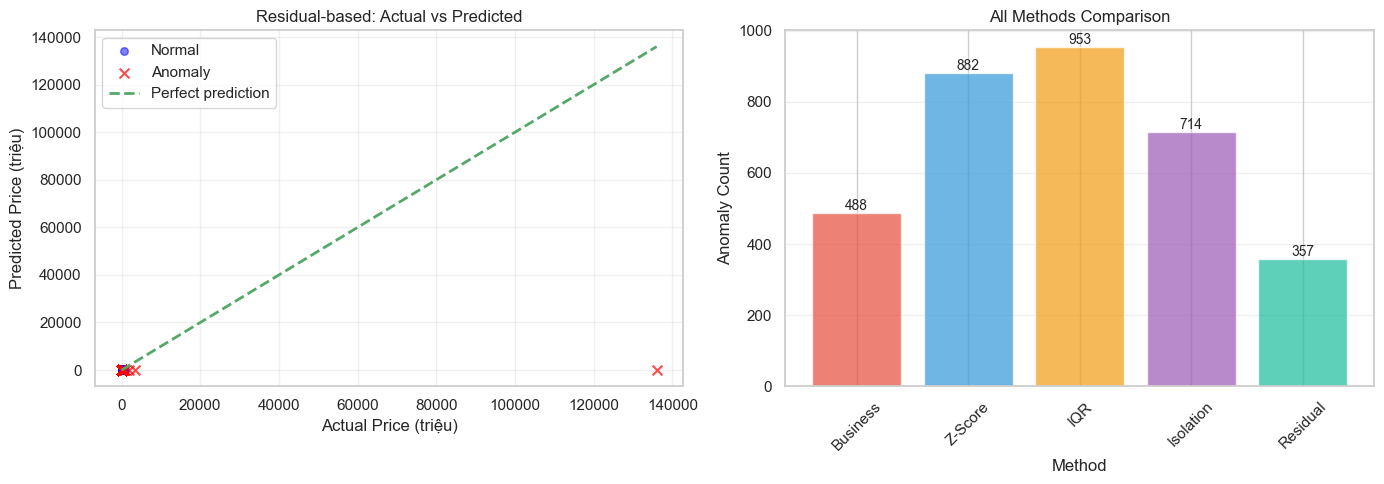


========== COMPARISON WITH OTHER METHODS ==========

Residual + Isolation: 94 (1.32%)
All 5 methods: 46 (0.64%)


In [71]:
def detect_residual_anomalies(df, trained_pipeline, X_full, threshold_percentile=95):
    y_true = np.expm1(df['price_log'])
    
    y_pred_log = trained_pipeline.predict(X_full)
    y_pred = np.expm1(y_pred_log)
    
    residuals = np.abs(y_true - y_pred)
    percentage_errors = np.where(y_true > 0, (residuals / y_true) * 100, 0)
    percentage_errors = np.clip(percentage_errors, 0, 1000)
    
    threshold = np.percentile(percentage_errors, threshold_percentile)
    
    anomalies = pd.DataFrame(index=df.index)
    anomalies['is_anomaly'] = percentage_errors > threshold
    anomalies['residual'] = residuals
    anomalies['percentage_error'] = percentage_errors
    anomalies['predicted_price'] = y_pred
    anomalies['actual_price'] = y_true
    
    print(f"\nResidual statistics:")
    print(f"  Mean residual: {residuals.mean():,.0f}")
    print(f"  Median residual: {np.median(residuals):,.0f}")
    print(f"  Mean percentage error: {percentage_errors.mean():.2f}%")
    print(f"  Threshold ({threshold_percentile}th percentile): {threshold:.2f}%")
    
    return anomalies

X_full = df_keep_outlier[numeric_features + categorical_features]

print(f"Using model: Random Forest from 'trained_models_remove'")
residual_anomalies = detect_residual_anomalies(
    df_keep_outlier, 
    trained_models_remove['Random Forest'],
    X_full,
    threshold_percentile=95
)

print("\n========== RESIDUAL-BASED ANOMALIES ==========\n")
print(f"Total anomalies detected: {residual_anomalies['is_anomaly'].sum()}")
print(f"Percentage: {residual_anomalies['is_anomaly'].sum() / len(df_keep_outlier) * 100:.2f}%")

anomaly_samples = df_keep_outlier[residual_anomalies['is_anomaly']].copy()
anomaly_samples['percentage_error'] = residual_anomalies.loc[residual_anomalies['is_anomaly'], 'percentage_error'].values
anomaly_samples['predicted_price'] = residual_anomalies.loc[residual_anomalies['is_anomaly'], 'predicted_price'].values
anomaly_samples['actual_price'] = residual_anomalies.loc[residual_anomalies['is_anomaly'], 'actual_price'].values

print("\nTop anomalies (sorted by percentage error):")
print(anomaly_samples[['brand', 'model', 'actual_price', 'predicted_price', 'km_driven', 'age', 'percentage_error']].sort_values('percentage_error', ascending=False).head(15))

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].scatter(residual_anomalies[~residual_anomalies['is_anomaly']]['actual_price'], 
                residual_anomalies[~residual_anomalies['is_anomaly']]['predicted_price'],
                alpha=0.5, s=30, label='Normal', c='blue')
axes[0].scatter(residual_anomalies[residual_anomalies['is_anomaly']]['actual_price'], 
                residual_anomalies[residual_anomalies['is_anomaly']]['predicted_price'],
                alpha=0.7, s=50, label='Anomaly', c='red', marker='x')
axes[0].plot([0, residual_anomalies['actual_price'].max()], 
             [0, residual_anomalies['actual_price'].max()], 
             'g--', lw=2, label='Perfect prediction')
axes[0].set_xlabel('Actual Price (triệu)')
axes[0].set_ylabel('Predicted Price (triệu)')
axes[0].set_title('Residual-based: Actual vs Predicted')
axes[0].legend()
axes[0].grid(alpha=0.3)

methods_comparison = pd.DataFrame({
    'Method': ['Business', 'Z-Score', 'IQR', 'Isolation', 'Residual'],
    'Count': [
        df_keep_outlier['business_anomaly'].sum(),
        df_keep_outlier['modified_z_anomaly'].sum(),
        df_keep_outlier['iqr_anomaly'].sum(),
        df_keep_outlier['isolation_anomaly'].sum(),
        residual_anomalies['is_anomaly'].sum()
    ]
})

axes[1].bar(methods_comparison['Method'], methods_comparison['Count'], 
            color=['#e74c3c', '#3498db', '#f39c12', '#9b59b6', '#1abc9c'], alpha=0.7)
axes[1].set_xlabel('Method')
axes[1].set_ylabel('Anomaly Count')
axes[1].set_title('All Methods Comparison')
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(axis='y', alpha=0.3)

for i, v in enumerate(methods_comparison['Count']):
    axes[1].text(i, v, f"{v}", ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

overlap_isolation = (df_keep_outlier['isolation_anomaly'] == 1) & (residual_anomalies['is_anomaly'] == True)
all_five = (df_keep_outlier['business_anomaly'] == 1) & (df_keep_outlier['modified_z_anomaly'] == 1) & (df_keep_outlier['iqr_anomaly'] == 1) & (df_keep_outlier['isolation_anomaly'] == 1) & (residual_anomalies['is_anomaly'] == True)

print("\n========== COMPARISON WITH OTHER METHODS ==========\n")
print(f"Residual + Isolation: {overlap_isolation.sum()} ({overlap_isolation.sum()/len(df_keep_outlier)*100:.2f}%)")
print(f"All 5 methods: {all_five.sum()} ({all_five.sum()/len(df_keep_outlier)*100:.2f}%)")

df_keep_outlier['residual_anomaly'] = residual_anomalies['is_anomaly'].astype(int)
df_keep_outlier['residual_error'] = residual_anomalies['percentage_error']
df_keep_outlier['predicted_price'] = residual_anomalies['predicted_price']

### 9.6 Ensemble

Threshold 0.3: 1054 anomalies (14.77%)
Threshold 0.4: 778 anomalies (10.90%)
Threshold 0.5: 688 anomalies (9.64%)
Threshold 0.6: 605 anomalies (8.48%)
Threshold 0.7: 406 anomalies (5.69%)

========== ENSEMBLE RESULTS (threshold=0.5) ==========

Total anomalies: 688
Percentage: 9.64%

Top anomalies by ensemble score:
          brand      model     price  km_driven  age  ensemble_score  \
4562      Honda  Air Blade       5.0     737486   16             1.0   
4238      Honda         SH  136000.0       1092    3             1.0   
2357        SYM     Attila       1.4     700000   20             1.0   
5370     Yamaha        Mio       6.0     854885    5             1.0   
340        Taya  Dòng khác       1.0     999999    5             1.0   
5577        SYM     Attila       2.0     258000   17             1.0   
1102      Honda        Cub       1.0     500000   44             1.0   
986       Honda       Wave       4.0     868686   23             1.0   
4847  Hãng khác  Dòng khác       2

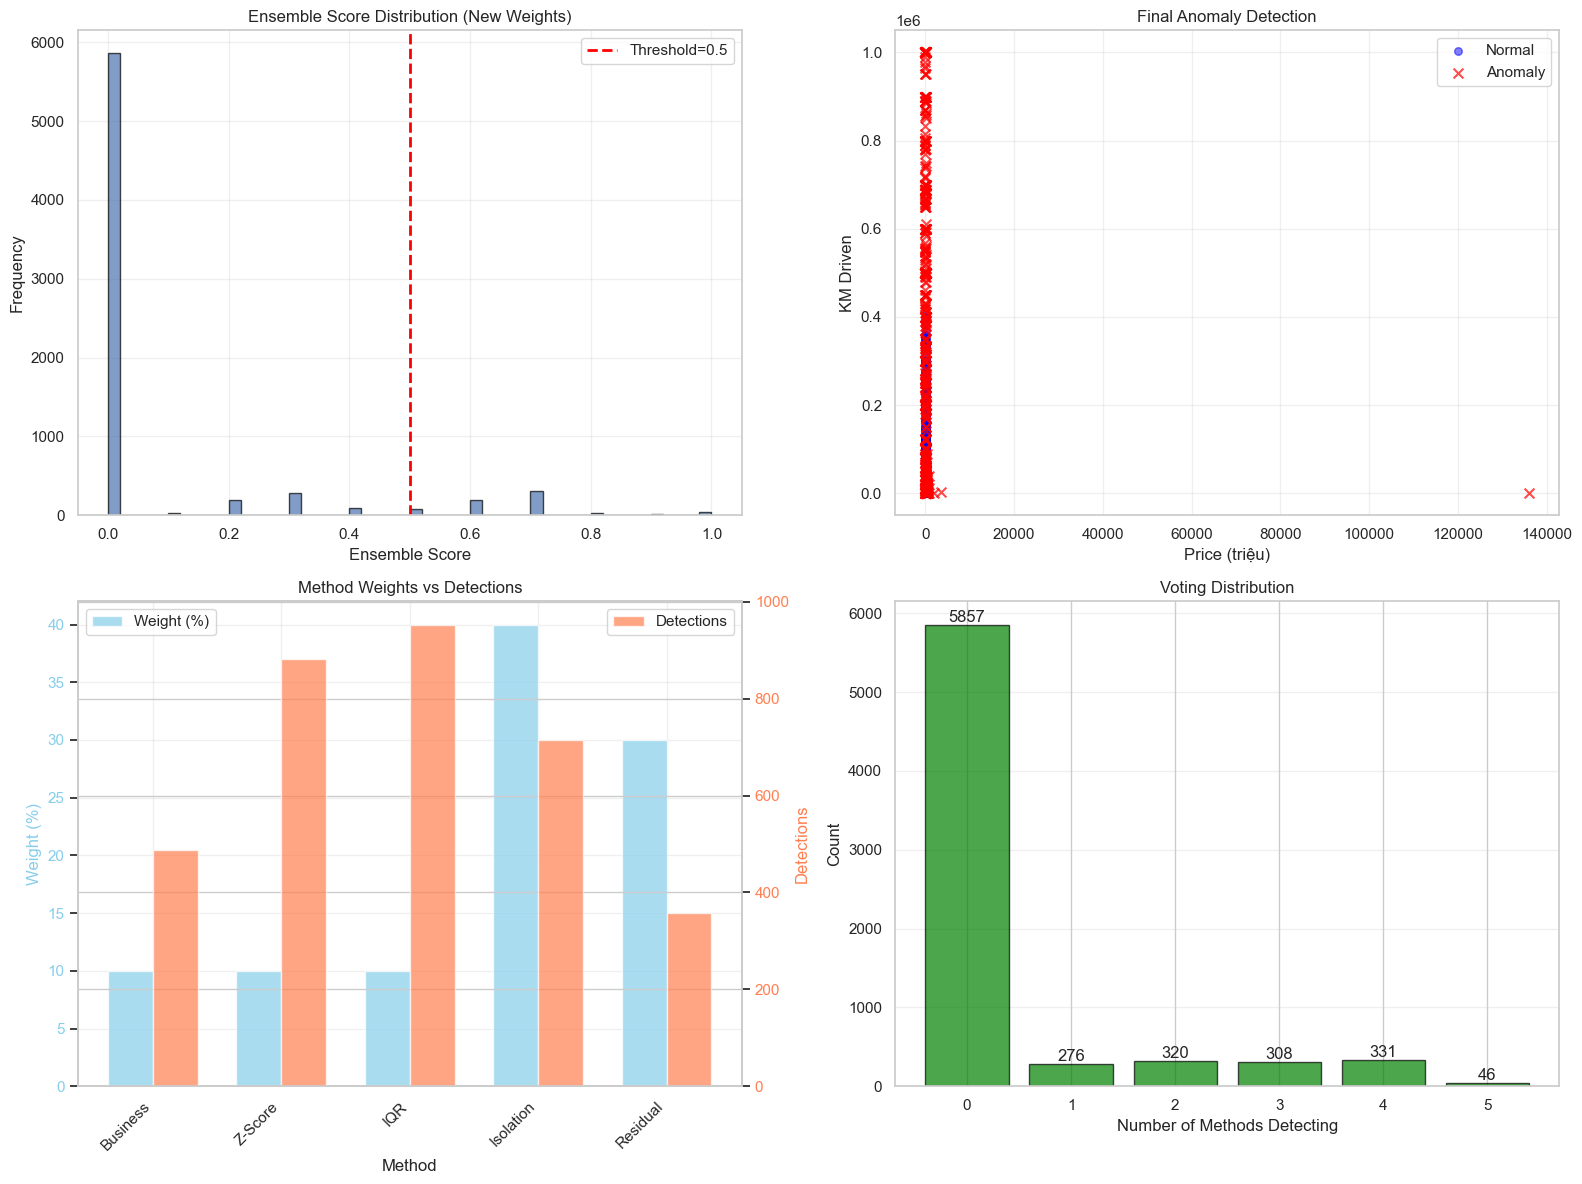


========== VOTING ANALYSIS ==========

0 methods: 5857 (82.05%)
1 methods: 276 (3.87%)
2 methods: 320 (4.48%)
3 methods: 308 (4.31%)
4 methods: 331 (4.64%)
5 methods: 46 (0.64%)

Final anomalies breakdown:
Detected by all 5 methods: 46
Detected by 4+ methods: 377
Detected by 3+ methods: 685
Detected by 2+ methods: 1005

========== WEIGHT CONFIGURATION ==========
Business Rules: 10%
Modified Z-Score: 10%
IQR: 10%
Isolation Forest: 40% ⭐
Residual-based: 30% ⭐


In [72]:
def ensemble_anomaly_detection(df, weights=None):
    if weights is None:
        weights = {
            'business': 0.1,
            'modified_z': 0.10,
            'iqr': 0.1,
            'isolation': 0.4,
            'residual': 0.3
        }
    
    ensemble_score = (
        df['business_anomaly'] * weights['business'] +
        df['modified_z_anomaly'] * weights['modified_z'] +
        df['iqr_anomaly'] * weights['iqr'] +
        df['isolation_anomaly'] * weights['isolation'] +
        df['residual_anomaly'] * weights['residual']
    )
    
    return ensemble_score

df_keep_outlier['ensemble_score'] = ensemble_anomaly_detection(df_keep_outlier)

thresholds = [0.3, 0.4, 0.5, 0.6, 0.7]
for threshold in thresholds:
    count = (df_keep_outlier['ensemble_score'] >= threshold).sum()
    print(f"Threshold {threshold}: {count} anomalies ({count/len(df_keep_outlier)*100:.2f}%)")

optimal_threshold = 0.5
df_keep_outlier['final_anomaly'] = (df_keep_outlier['ensemble_score'] >= optimal_threshold).astype(int)

print(f"\n========== ENSEMBLE RESULTS (threshold={optimal_threshold}) ==========\n")
print(f"Total anomalies: {df_keep_outlier['final_anomaly'].sum()}")
print(f"Percentage: {df_keep_outlier['final_anomaly'].sum()/len(df_keep_outlier)*100:.2f}%")

final_anomalies = df_keep_outlier[df_keep_outlier['final_anomaly'] == 1].copy()
print("\nTop anomalies by ensemble score:")
print(final_anomalies[['brand', 'model', 'price', 'km_driven', 'age', 'ensemble_score', 
                       'business_anomaly', 'modified_z_anomaly', 'iqr_anomaly', 
                       'isolation_anomaly', 'residual_anomaly']].sort_values('ensemble_score', ascending=False).head(20))

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

axes[0, 0].hist(df_keep_outlier['ensemble_score'], bins=50, alpha=0.7, edgecolor='black')
axes[0, 0].axvline(x=optimal_threshold, color='red', linestyle='--', linewidth=2, label=f'Threshold={optimal_threshold}')
axes[0, 0].set_xlabel('Ensemble Score')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Ensemble Score Distribution (New Weights)')
axes[0, 0].legend()
axes[0, 0].grid(alpha=0.3)

axes[0, 1].scatter(df_keep_outlier[df_keep_outlier['final_anomaly']==0]['price'], 
                  df_keep_outlier[df_keep_outlier['final_anomaly']==0]['km_driven'],
                  alpha=0.5, s=30, label='Normal', c='blue')
axes[0, 1].scatter(df_keep_outlier[df_keep_outlier['final_anomaly']==1]['price'], 
                  df_keep_outlier[df_keep_outlier['final_anomaly']==1]['km_driven'],
                  alpha=0.7, s=50, label='Anomaly', c='red', marker='x')
axes[0, 1].set_xlabel('Price (triệu)')
axes[0, 1].set_ylabel('KM Driven')
axes[0, 1].set_title('Final Anomaly Detection')
axes[0, 1].legend()
axes[0, 1].grid(alpha=0.3)

method_contribution = pd.DataFrame({
    'Method': ['Business', 'Z-Score', 'IQR', 'Isolation', 'Residual'],
    'Weight': [0.1, 0.10, 0.1, 0.4, 0.3],
    'Detections': [
        df_keep_outlier['business_anomaly'].sum(),
        df_keep_outlier['modified_z_anomaly'].sum(),
        df_keep_outlier['iqr_anomaly'].sum(),
        df_keep_outlier['isolation_anomaly'].sum(),
        df_keep_outlier['residual_anomaly'].sum()
    ]
})

x = np.arange(len(method_contribution))
width = 0.35

bars1 = axes[1, 0].bar(x - width/2, method_contribution['Weight']*100, width, 
                       label='Weight (%)', alpha=0.7, color='skyblue')
ax2 = axes[1, 0].twinx()
bars2 = ax2.bar(x + width/2, method_contribution['Detections'], width, 
                label='Detections', alpha=0.7, color='coral')

axes[1, 0].set_xlabel('Method')
axes[1, 0].set_ylabel('Weight (%)', color='skyblue')
ax2.set_ylabel('Detections', color='coral')
axes[1, 0].set_title('Method Weights vs Detections')
axes[1, 0].set_xticks(x)
axes[1, 0].set_xticklabels(method_contribution['Method'], rotation=45, ha='right')
axes[1, 0].tick_params(axis='y', labelcolor='skyblue')
ax2.tick_params(axis='y', labelcolor='coral')
axes[1, 0].legend(loc='upper left')
ax2.legend(loc='upper right')
axes[1, 0].grid(alpha=0.3)

vote_counts = (df_keep_outlier[['business_anomaly', 'modified_z_anomaly', 'iqr_anomaly', 
                                 'isolation_anomaly', 'residual_anomaly']].sum(axis=1))
vote_distribution = vote_counts.value_counts().sort_index()

axes[1, 1].bar(vote_distribution.index, vote_distribution.values, alpha=0.7, color='green', edgecolor='black')
axes[1, 1].set_xlabel('Number of Methods Detecting')
axes[1, 1].set_ylabel('Count')
axes[1, 1].set_title('Voting Distribution')
axes[1, 1].set_xticks(range(6))
axes[1, 1].grid(axis='y', alpha=0.3)

for i, v in enumerate(vote_distribution.values):
    axes[1, 1].text(vote_distribution.index[i], v, str(v), ha='center', va='bottom')

plt.tight_layout()
plt.show()

print("\n========== VOTING ANALYSIS ==========\n")
for i in range(6):
    count = (vote_counts == i).sum()
    pct = count / len(df_keep_outlier) * 100
    print(f"{i} methods: {count} ({pct:.2f}%)")

print(f"\nFinal anomalies breakdown:")
print(f"Detected by all 5 methods: {(vote_counts == 5).sum()}")
print(f"Detected by 4+ methods: {(vote_counts >= 4).sum()}")
print(f"Detected by 3+ methods: {(vote_counts >= 3).sum()}")
print(f"Detected by 2+ methods: {(vote_counts >= 2).sum()}")

print("\n========== WEIGHT CONFIGURATION ==========")
print("Business Rules: 10%")
print("Modified Z-Score: 10%")
print("IQR: 10%")
print("Isolation Forest: 40% ⭐")
print("Residual-based: 30% ⭐")

* Kết quả 
    1. Thử nghiệm trên chính dataset hơn 7000 records
    2. Total Anomalies: 688 (9.64%)
    3. Trọng số: Isolation Forest (40%) + Residual (30%) + Others (30%)
    4. Thiết lập ngưỡng 0.5


### 9.7 Save model

In [74]:
# Isolation Forest
X_iso = df_keep_outlier[['price','km_driven','age']].values
iso_model = IsolationForest(contamination=0.1, random_state=42, n_estimators=100)
iso_model.fit(X_iso)
joblib.dump(iso_model, "isolation_forest.joblib")


rf_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("rf", RandomForestRegressor(n_estimators=200, random_state=42))
])
X_full = df_keep_outlier[numeric_features + categorical_features]
y_full = df_keep_outlier[target]
rf_pipeline.fit(X_full, y_full)
joblib.dump(rf_pipeline, "residual_rf.joblib")


# Ensemble weights
import json
weights = {"business":0.1,"modified_z":0.1,"iqr":0.1,"isolation":0.4,"residual":0.3}
with open("ensemble_weights.json","w") as f:
    json.dump(weights,f)
